# Исследование данных о продажах компьютерных игр

В нашем распоряжении данные о продажах компьютерных игр до 2016 года. Данные поступили из открытых источников и содержат в себе информацию о продажах, оценки пользователей и экспертов, жанры и платформы.

**Основная цель исследования:**

* Выявить определяющие успешность игры закономерности для осуществления прогноза выявления потенциально популярного продукта  и планирования рекламных кампаний.

**Ход исследования:**

    Шаг 1. Импорт данных.
    Шаг 2. Подготовка данных.
        2.1 Приведение названий столбцов к нижнему регистру.
        2.2 Преобразование типов данных.
        2.3 Обработка пропусков.
        2.4 Подсчет суммарных продаж во всех регионах.
    Шаг 3. Проведение исследовательского анализа данных:
        3.1 Отбор временных периодов для исследования.
        3.2 Исследование продаж в зависимости от платформы.
        3.3 Отбор данных актуального временного периода (который позволяет сделать прогноз на 2017 год).
        3.4 Отброс данных предыдущих лет.
        3.5 Определение лидеров среди платформ по продажам. Отбор потенциально прибыльных платформ.
        3.6 Построение графика "ящика с усами" по продажам игр в разбивке по платформам.
        3.7 Исследование влияния на продажи внутри одной из платформ отзывы пользователей и критиков.
        3.8 Соотнесение с продажами игр на других платформах.
        3.9 Исследование распределения игр по жанрам.
    Шаг 4. Составление портрета пользователя для каждого региона.
        4.1 Определение топ-5 популярных платформ. 
        4.2 Определение топ-5 популярных жанров.
        4.3 Исследование влияние рейтинга ESRB на продажи.
    Шаг 5. Проверка гипотез:
        5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
        5.2 Средние пользовательские рейтинги жанров Action и Sports разные.
    Шаг 6. Общий вывод по исследованию.
    



**Описание данных:**

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Импорт данных.

**Импорт используемых библиотек**

In [131]:
#импорт библиотеки pandas
import pandas as pd 

#импорт библиотеки numpy
import numpy as np

#импорт библиотеки seaborn 
import seaborn as sns

#импорт библиотеки matplotlib.pyplot
import matplotlib.pyplot as plt

#импорт библиотеки stats
from scipy import stats as st

**Импорт исходных данных**

In [132]:
try:
    #импорт данных методом read_csv (для ревью)
    data=pd.read_csv('/datasets/games.csv')
except:
    #импорт данных методом read_csv (для работы)
    data=pd.read_csv(r'C:\Users\garsh\OneDrive\Рабочий стол\Обучение\Практикум\Спринт 4 (1 жд)\Проект\games.csv')

Ознакомимся с данными: посмотрим на информацию о столбцах методом info(), а также посмотрим на несколько строк из таблицы методом head()

In [133]:
#вызов информации о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [134]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Из полученного видно: в таблице 10 столбцов, названия которых начинаются с Большой Буквы, в столбцах представлены различные типы данных (с ходу можно сказать, что нужно подправить столбец с годом: с float 2006.0 на int 2006), но самое главное: в данных есть пропуски, причём их количество разнится от столбца к столбцу. Нужно будет сделать необходимые преобразования.

## Шаг 2. Подготовка данных.

### 2.1 Приведение названий столбцов к нижнему регистру.

In [135]:
#определение названий столбцов до приведения
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [136]:
#приведение столбцов к нижнему регистру
data.columns=data.columns.str.lower()

#проверка приведения
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2 Преобразование типов данных.

Выведем информацию об используемых типах данных в столбцах

In [137]:
#информация о типах данных, вывод методом info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Согласно описанию данных столбец year_of_release содержит год выпуска. Соответственно данный тип данных должен быть не float, а int (целые числа). Также отметим, что в данных содержатся пропуски. Для корректной обработки данных пропсуки пока оставим, а обратимся к числам через преобразование из библиотеки numpy floor (округление до целого меньшего числа, при этом nan преобразуется в "< NA >", но "ощущение" пропуска не уходит), а затем уже переведём формат данных методом astype().

In [138]:
#изменение типа данных столбца year_of_release (из значений с плавающей точкой в целочисленные) методом astype 
#для избежания ошибки преобразования пропусков, сначала преобразуем числа в ближайшие целые методом numpy.floor
data['year_of_release']=np.floor(data['year_of_release']).astype('Int16')

Аналогичным образом можно заменить данные столбца critic_score.

In [139]:
data['critic_score']=np.floor(data['critic_score']).astype('Int16')

Также столбец user_score имеет формат object, хотя это должен быть числовой формат. Проверим уникальные значения столбца:

In [140]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце присутствуют как значения оценок, так и пропуски, и значение 'tbd'(to be determined) - "будет определено". Возможно, на данном этапе лучше оставить всё как есть, так как эти значения могут пригодиться в дальнейшем.

Проверим изменение типов данных в столбцах year_of_release, critic_score:

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int16  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int16  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int16(2), float64(4), object(5)
memory usage: 1.2+ MB


### 2.3 Обработка пропусков.

Пропуски присутствуют в нескольких колонках. Рассмотрим подробнее.

**Обработка пропусков в столбцах name, genre**

Обратимся к пропущенным значениям по столбцу с названием игр name:

In [142]:
#поиск пропущенных значений в столбце name методом isna()
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Как видно из вызова метода info() в пункте 2.2, в столбцах name, genre 2 пропуска. При поиске по столбцу name видно, что эти же пропущенные значения и в столбце genre. С одной стороны, для игры в строке 659 значение продаж составляет 1.78 млн копий в Северной Америке, а в Европе - 0.53 млн. А для строки №14244 продажи указаны только в Японии. Также для обеих игр отсутствуют рейтинги игроков и критиков. Есть подозрение, что информция о данных играх забита с какими-то ошибками и есть смысл удалить данные строки, тем более, что для 16715 строк две удаленные вряд ли принесут какое-то серьёзное изменение. 

In [143]:
#удаление пропусков по столбцу name методом dropna
data=data.dropna(subset=['name'])

#проверка удаленных пропусков методом info()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int16  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int16  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int16(2), float64(4), object(5)
memory usage: 1.4+ MB


**Обработка пропусков в столбце с годом выпуска year_of_release**

Посмотрим на количество пропусков по столбцу:

In [144]:
#количество пропусков в столбце year_of_release
data['year_of_release'].isna().sum()

269

In [145]:
#относительное количество пропусков в столбце year_of_release
data['year_of_release'].isna().mean()

0.016095255190570215

Как видно, пропуски присутствуют в 1.6% от всех игр и возможно есть смысл удалить данные строки, так как по-хорошему название есть у каждой игры, однако на всякий случай пока они не мешают можно оставить как есть и вернуться к этому вопросу позднее.

**Обработка пропусков в столбце с оценками критиков critic_score**

В данном столбце значительное количество пропусков (около половины), что в приницпе может быть: не все игры оцениваются критиками, например какие-то могут быть не замечены в принципе (очень малая популярность). Так как число пропусков значительно, и логически объяснимо, оставим их.

**Обработка пропусков в столбце с оценками игроков**

Как в случае с оценками критиков, так и с оценками игроков: количество пропусков велико, и это может быть объяснимо: не всем игрокам вообще свойственно выставлять оценку, особенно если их об этом никто может и не спрашивал. Есть смысл оставить пропуски. Однако, для данного столбца помимо пропусков есть ещё интересное значение, "tbd" (to be determined) - будет определено:

In [146]:
#вывод уникальных значений столбца user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Фактически, "будет определено" - это значит, что оценки нет. Тогда логично заменить данные значения на пропуски. 

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Верное решение.</div>

In [147]:
#замена значений 'tbd' на пропуски NaN
data['user_score']=data['user_score'].replace('tbd',np.nan)

#проверка замены
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int16  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int16  
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: Int16(2), float64(4), object(5)
memory usage: 1.4+ MB


**Обработка пропущенных данных столбца rating**

Согласно описанию данных, в этом столбце хранятся значения возрастного рейтинга игры по мнению ассоциации ESRB. Известно, что  ESRB была основана в 1994 году, оценим число пропусков по годам:

In [149]:
#подсчет числа пропусков по годам
data.groupby('year_of_release')['rating'].count()

year_of_release
1980       0
1981       0
1982       0
1983       0
1984       0
1985       1
1986       0
1987       0
1988       1
1989       0
1990       0
1991       0
1992       2
1993       0
1994       1
1995       0
1996       7
1997      19
1998      32
1999      42
2000     148
2001     339
2002     655
2003     613
2004     598
2005     706
2006     678
2007     821
2008     981
2009    1011
2010     799
2011     703
2012     355
2013     316
2014     345
2015     315
2016     280
Name: rating, dtype: int64

Как видно из полученных данных, в основном нулевые значения соответствуют диапазону лет от 1980 до 1995 (случаются единичные значения, однако скорее всего это ошибки). Следовательно, пропуски в данном столбце заполнять не нужно: для чуть ли не половины исследуемых лет этого показателя не могло существовать.

In [150]:
#подсчет числа пропусков по годам, сравнение с числом игр
data.groupby('year_of_release')[['rating','name']].count()

,rating,name
year_of_release,,
1980,0,9
1981,0,46
1982,0,36
1983,0,17
1984,0,14
1985,1,14
1986,0,21
1987,0,16
1988,1,15


Отсюда видно: есть пропуски и для выпущенных игр уже во время существования организации. Заменим тогда пропуски на значение-заглушку, что может повлиять на дальнейшие результаты.

In [151]:
#заполнение пропусков в столбце rating значением no_rate
data['rating']=data['rating'].fillna('no_rate')

#проверка заполнения пропусков:
data['rating'].isna().sum()

0

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 

    "окончание новой части исследования"
</div>

### 2.4 Подсчет суммарных продаж во всех регионах.

In [152]:
#суммируем данные по столбцам с продажами и добавляем в новый столбец sales_sum
data['sales_sum']=data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

## Шаг 3. Проведение исследовательского анализа данных.

### 3.1 Отбор временных периодов для исследования.

Проверим, сколько игр выпускалось в разные годы и есть ли смысл рассматривать все периоды.

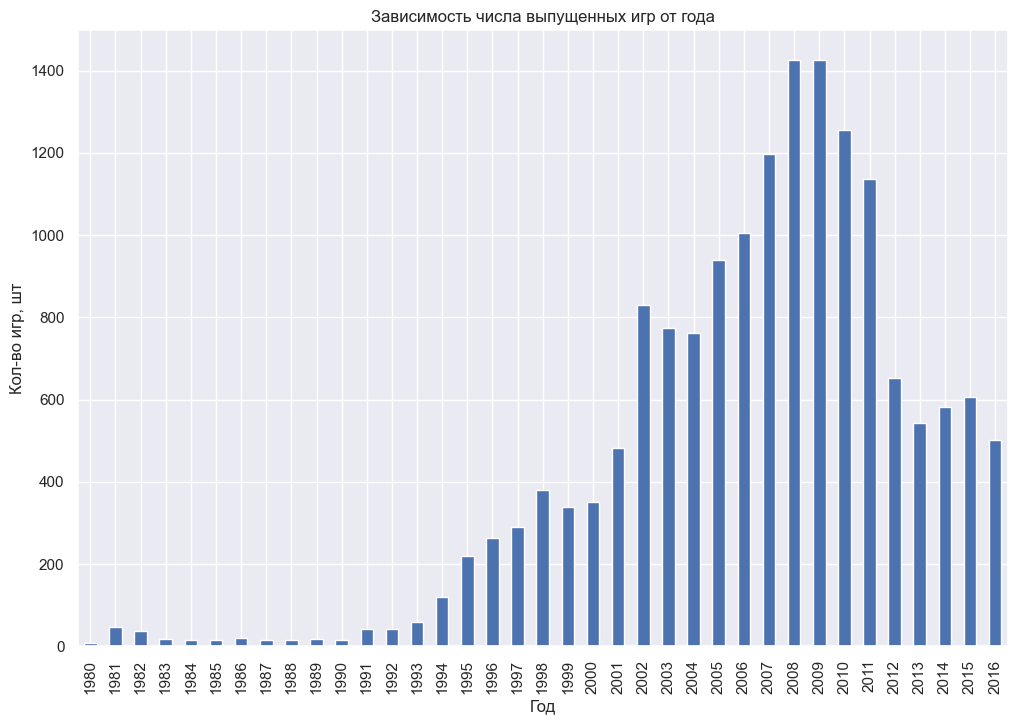

In [153]:
#построение диаграммы количества игр по годам
data.groupby('year_of_release')['name'].count().plot.bar(title='Зависимость числа выпущенных игр от года',\
                                                         xlabel='Год', ylabel='Кол-во игр, шт', figsize=(12,8));

Как видно из графика, можно предположить, что активный рост начался в 1991 году, а до него было плато с незначительным количеством выпускаемых игр. Проверим по диаграмме размаха:

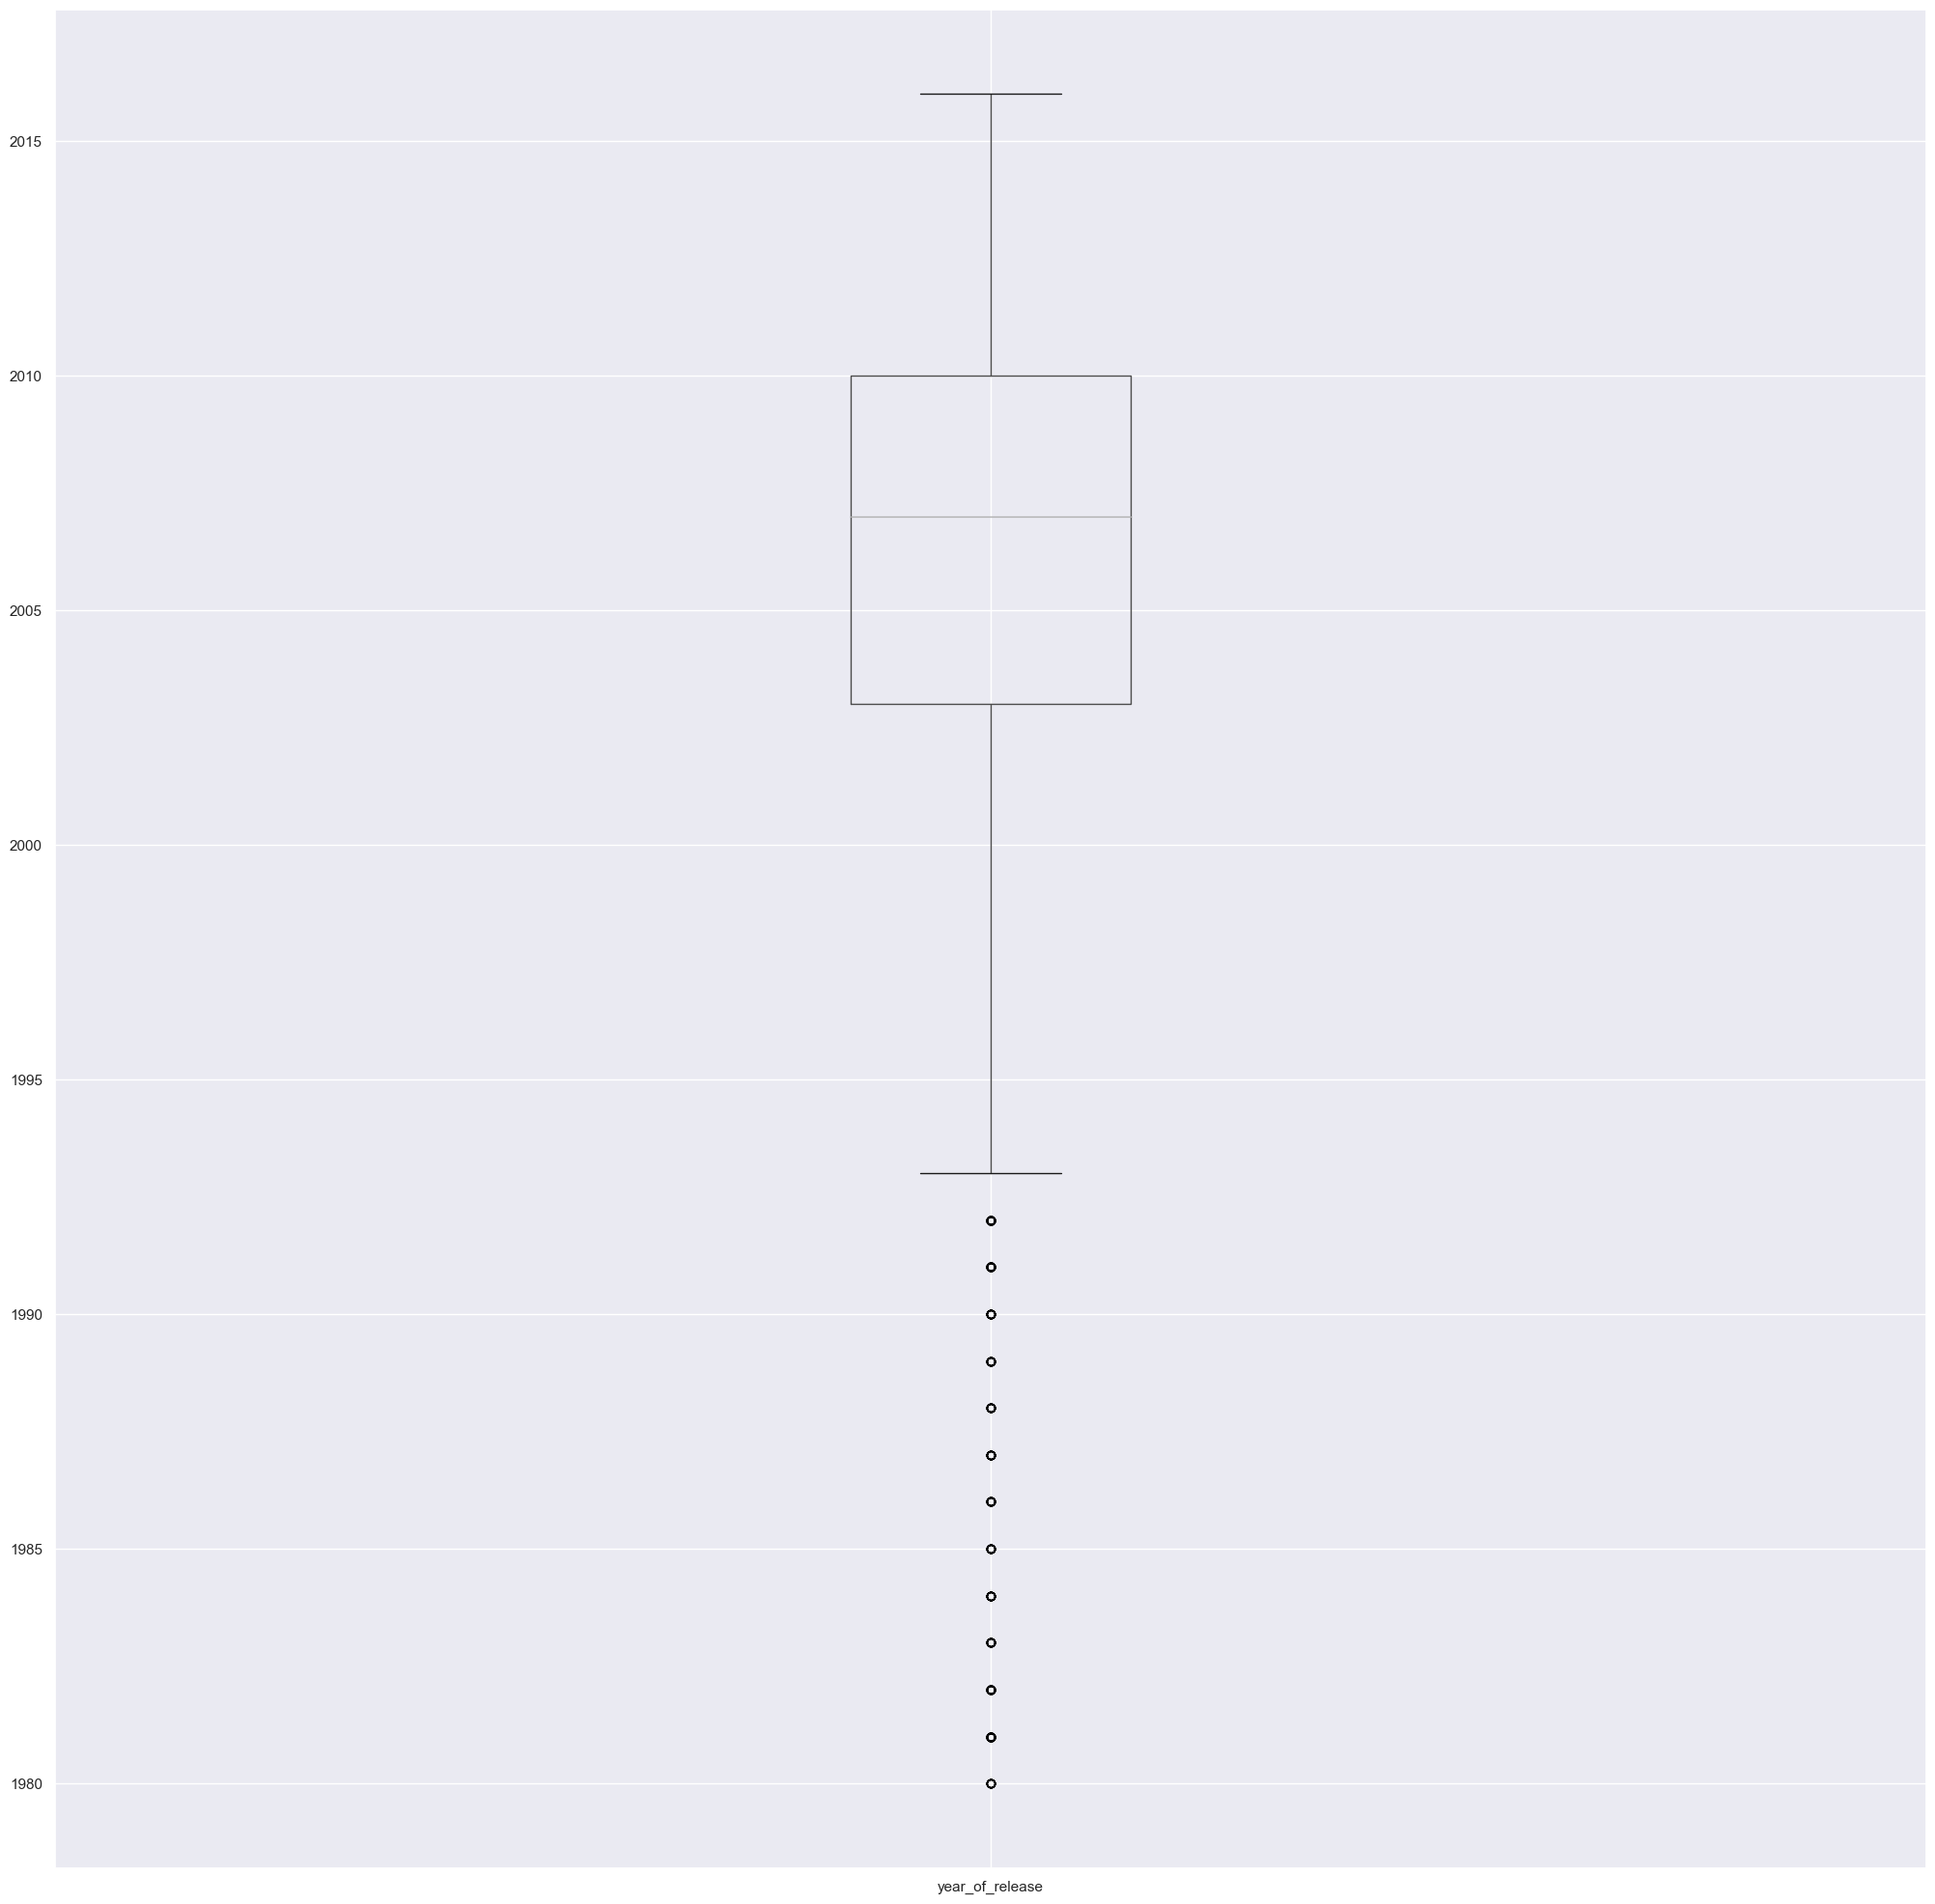

In [154]:
data.boxplot(column='year_of_release');

В соответствии с данной диаграммой видно, что всё, что раньше 1993 года - можно считать выбросами. Тогда есть смысл отбросить эти значения:

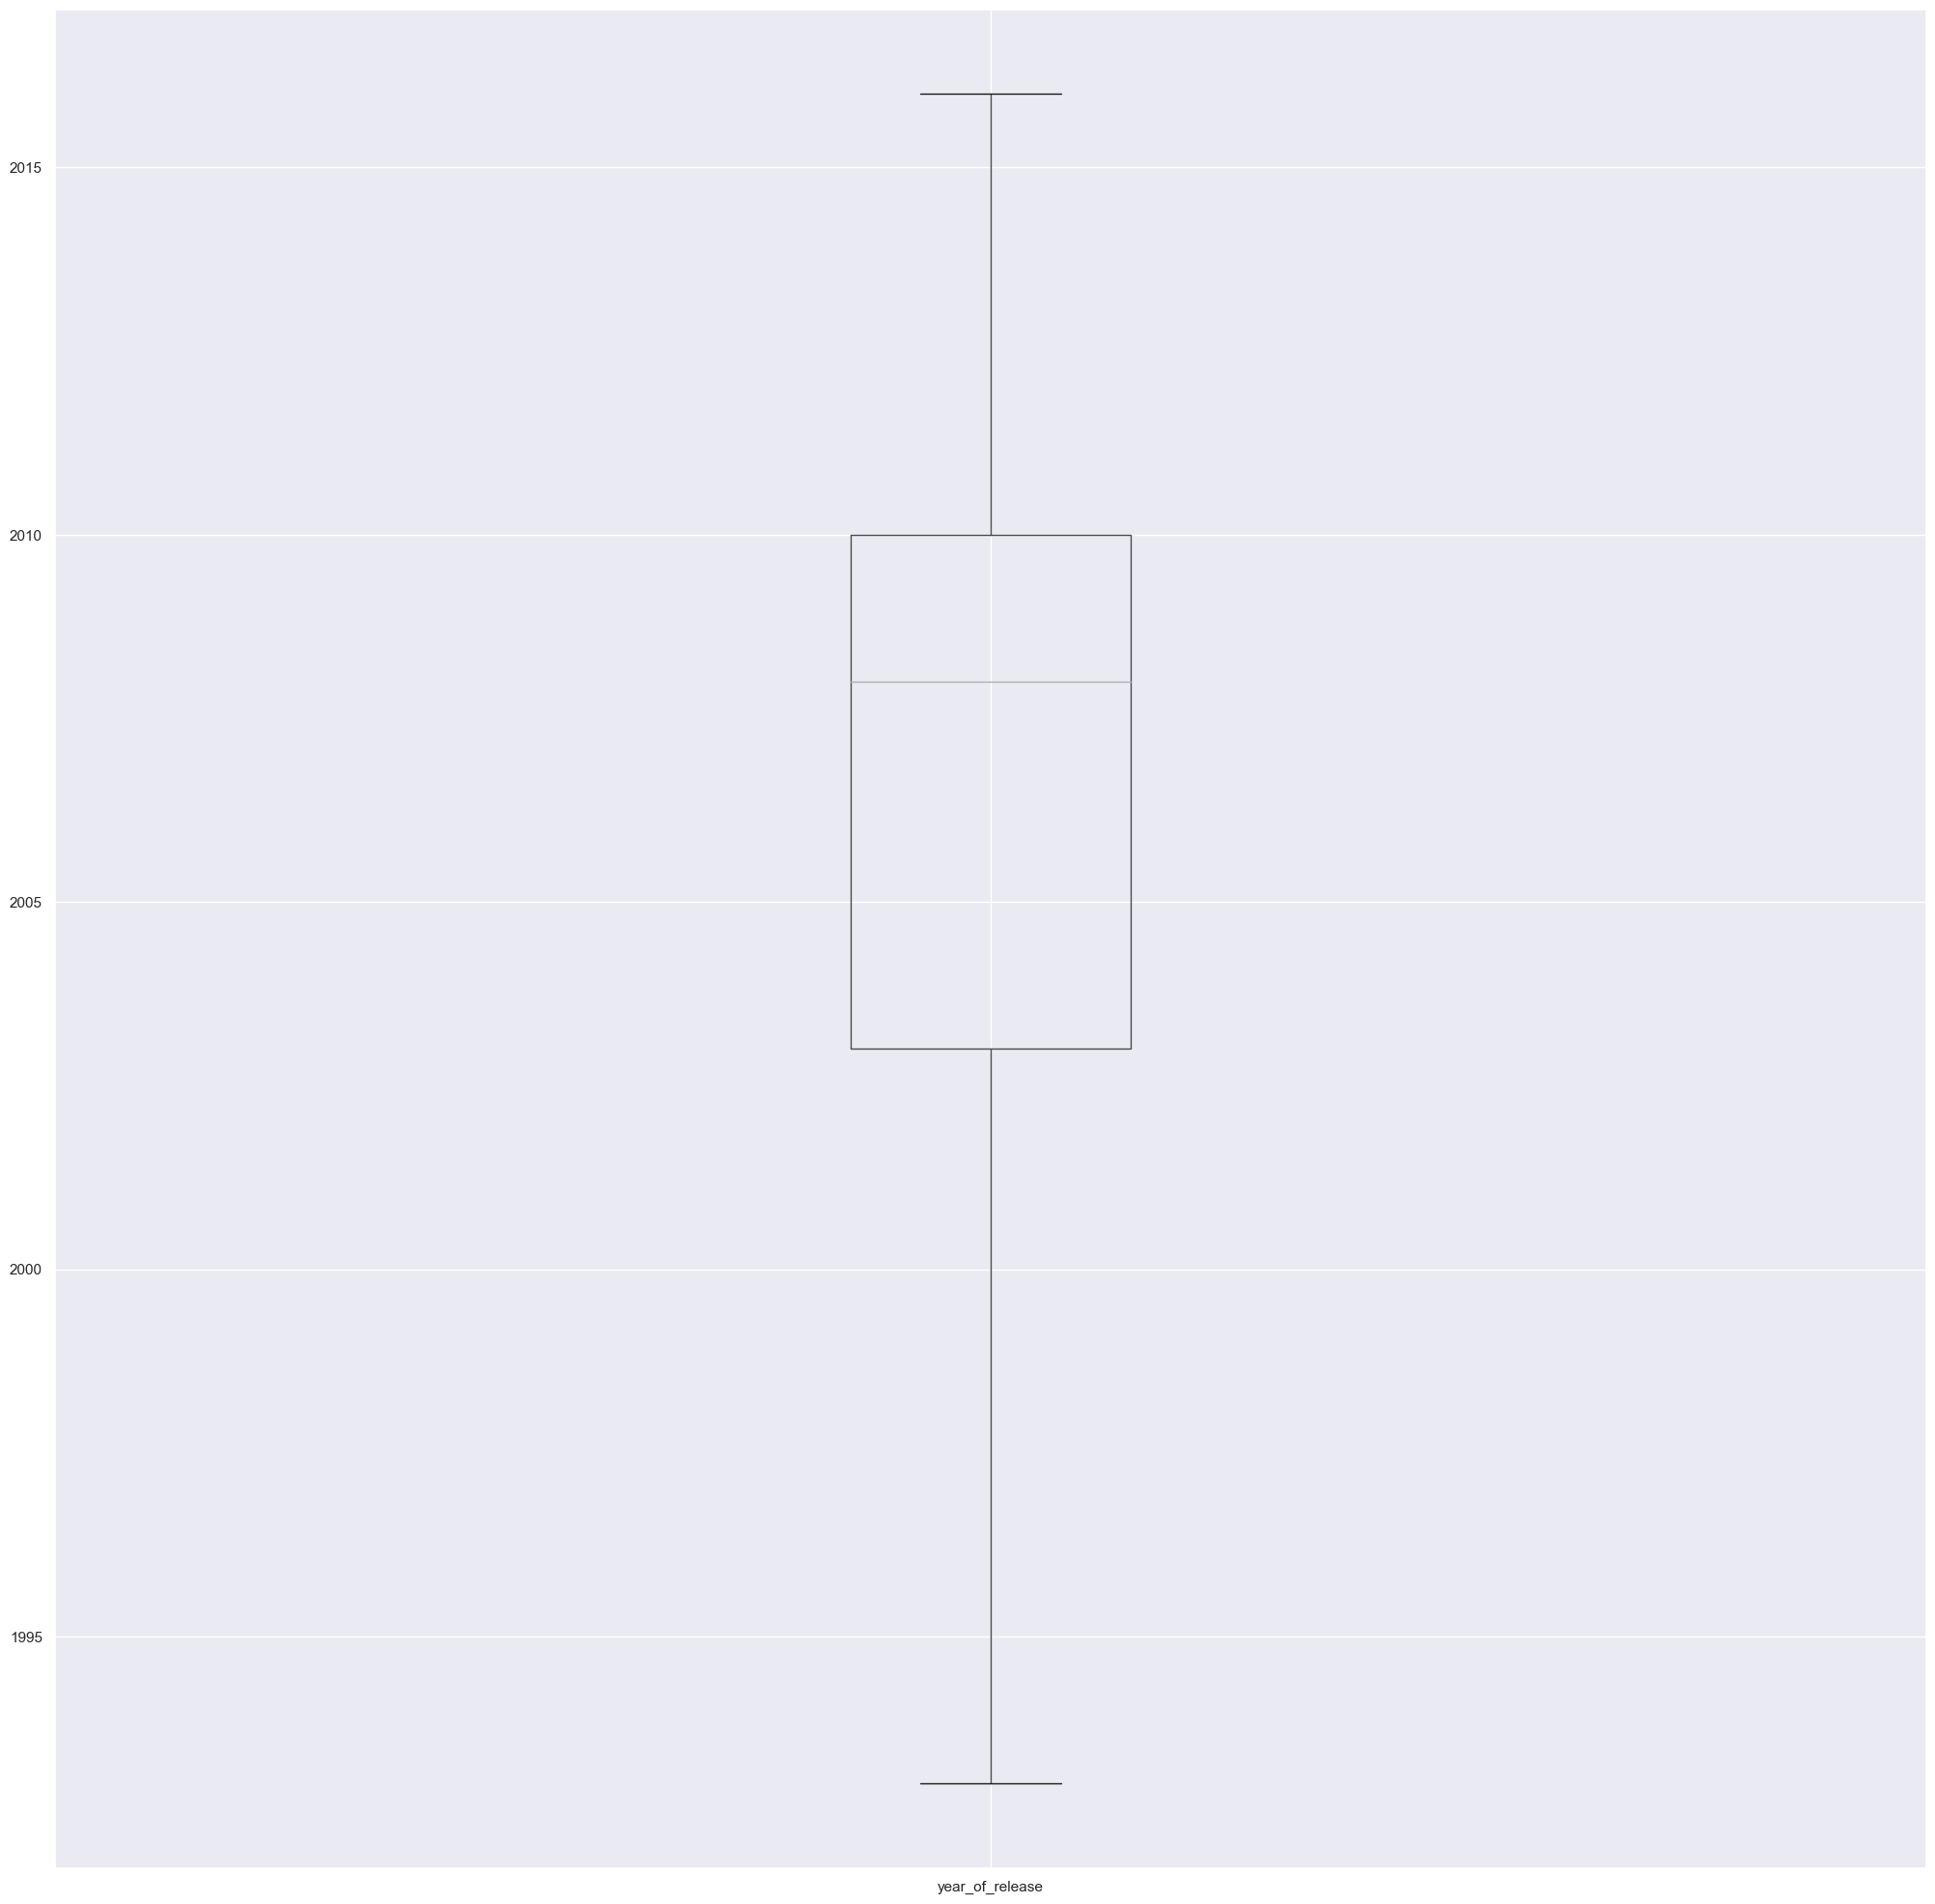

In [155]:
#сохранение данных от 1993 года включительно
data=data[data['year_of_release']>=1993]

#проверка разброса
data.boxplot(column='year_of_release');

### 3.2 Исследование продаж в зависимости от платформы.

Рассмотрим наиболее значимые в качестве продаж платформы. Необхдимо понять, за какой характерный срок появляются новые и исчезают старые платформы

Посмотрим на сводную таблицу, в которой посчитаем суммарные продажи по платформам, а также посчитаем количество лет, которое платформа существовала.

In [156]:
#составление сводной таблицы для строк по platform, для продаж - сумма, для лет - количество уникальных лет, сортировка по убыванию продаж
pivot_platform_sales_year=data.pivot_table(index='platform',values=['sales_sum','year_of_release'],\
                 aggfunc={'sales_sum':sum,'year_of_release':'nunique'}).\
sort_values(by='sales_sum',ascending=False) 
#вызов таблицы
pivot_platform_sales_year

,sales_sum,year_of_release
platform,,
PS2,1233.56,12
X360,961.24,12
PS3,931.34,11
Wii,891.18,11
DS,802.76,10
PS,727.58,10
PS4,314.14,4
GBA,312.88,8
PSP,289.53,12


Как видно, для устройств с наибольшими продажами дл лет использования получены значения в районе 10-12 лет. Также бросается в глаза величина значения для персонального компьютера (PC). Также присутствуют значения меньше 10: может быть данные платформы быстро устарели, а может быть они ещё находятся в использовании. Проверим платформы, которые в использовании:

In [157]:
#составление сводной таблицы для строк по platform, для лет -максмальное значение года, сортировка по годам
pivot_platform_year=data.pivot_table(index='platform',values='year_of_release',aggfunc={max}).\
sort_values(by='max',ascending=False) 
#объединим результаты двух сводных таблиц с учётом длительности работы по годам и актуальности на 2016 год:
pivot_platform_sales_year_final=pivot_platform_sales_year.join(pivot_platform_year,on='platform',how='inner').\
sort_values(by=['sales_sum','max'],ascending=False)
#вывод итоговой таблицы
pivot_platform_sales_year_final

,sales_sum,year_of_release,max
platform,,,
PS2,1233.56,12,2011
X360,961.24,12,2016
PS3,931.34,11,2016
Wii,891.18,11,2016
DS,802.76,10,2013
PS,727.58,10,2003
PS4,314.14,4,2016
GBA,312.88,8,2007
PSP,289.53,12,2015


Отсюда видно, что на 2016 год существует только 9 платформ, на которые выпускаются игры, при этом в 5 самых продаваемых случаях - это только 3 позиции: X360, Wii, PS3.

По исходным данным определим наиболее популярные платформы:

In [158]:
#подсчет продаж по плафтормам
pivot_platform_sales=data.pivot_table(index='platform',values='sales_sum',\
                 aggfunc='sum').\
sort_values(by='sales_sum',ascending=False) 
#вызов таблицы
pivot_platform_sales

,sales_sum
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


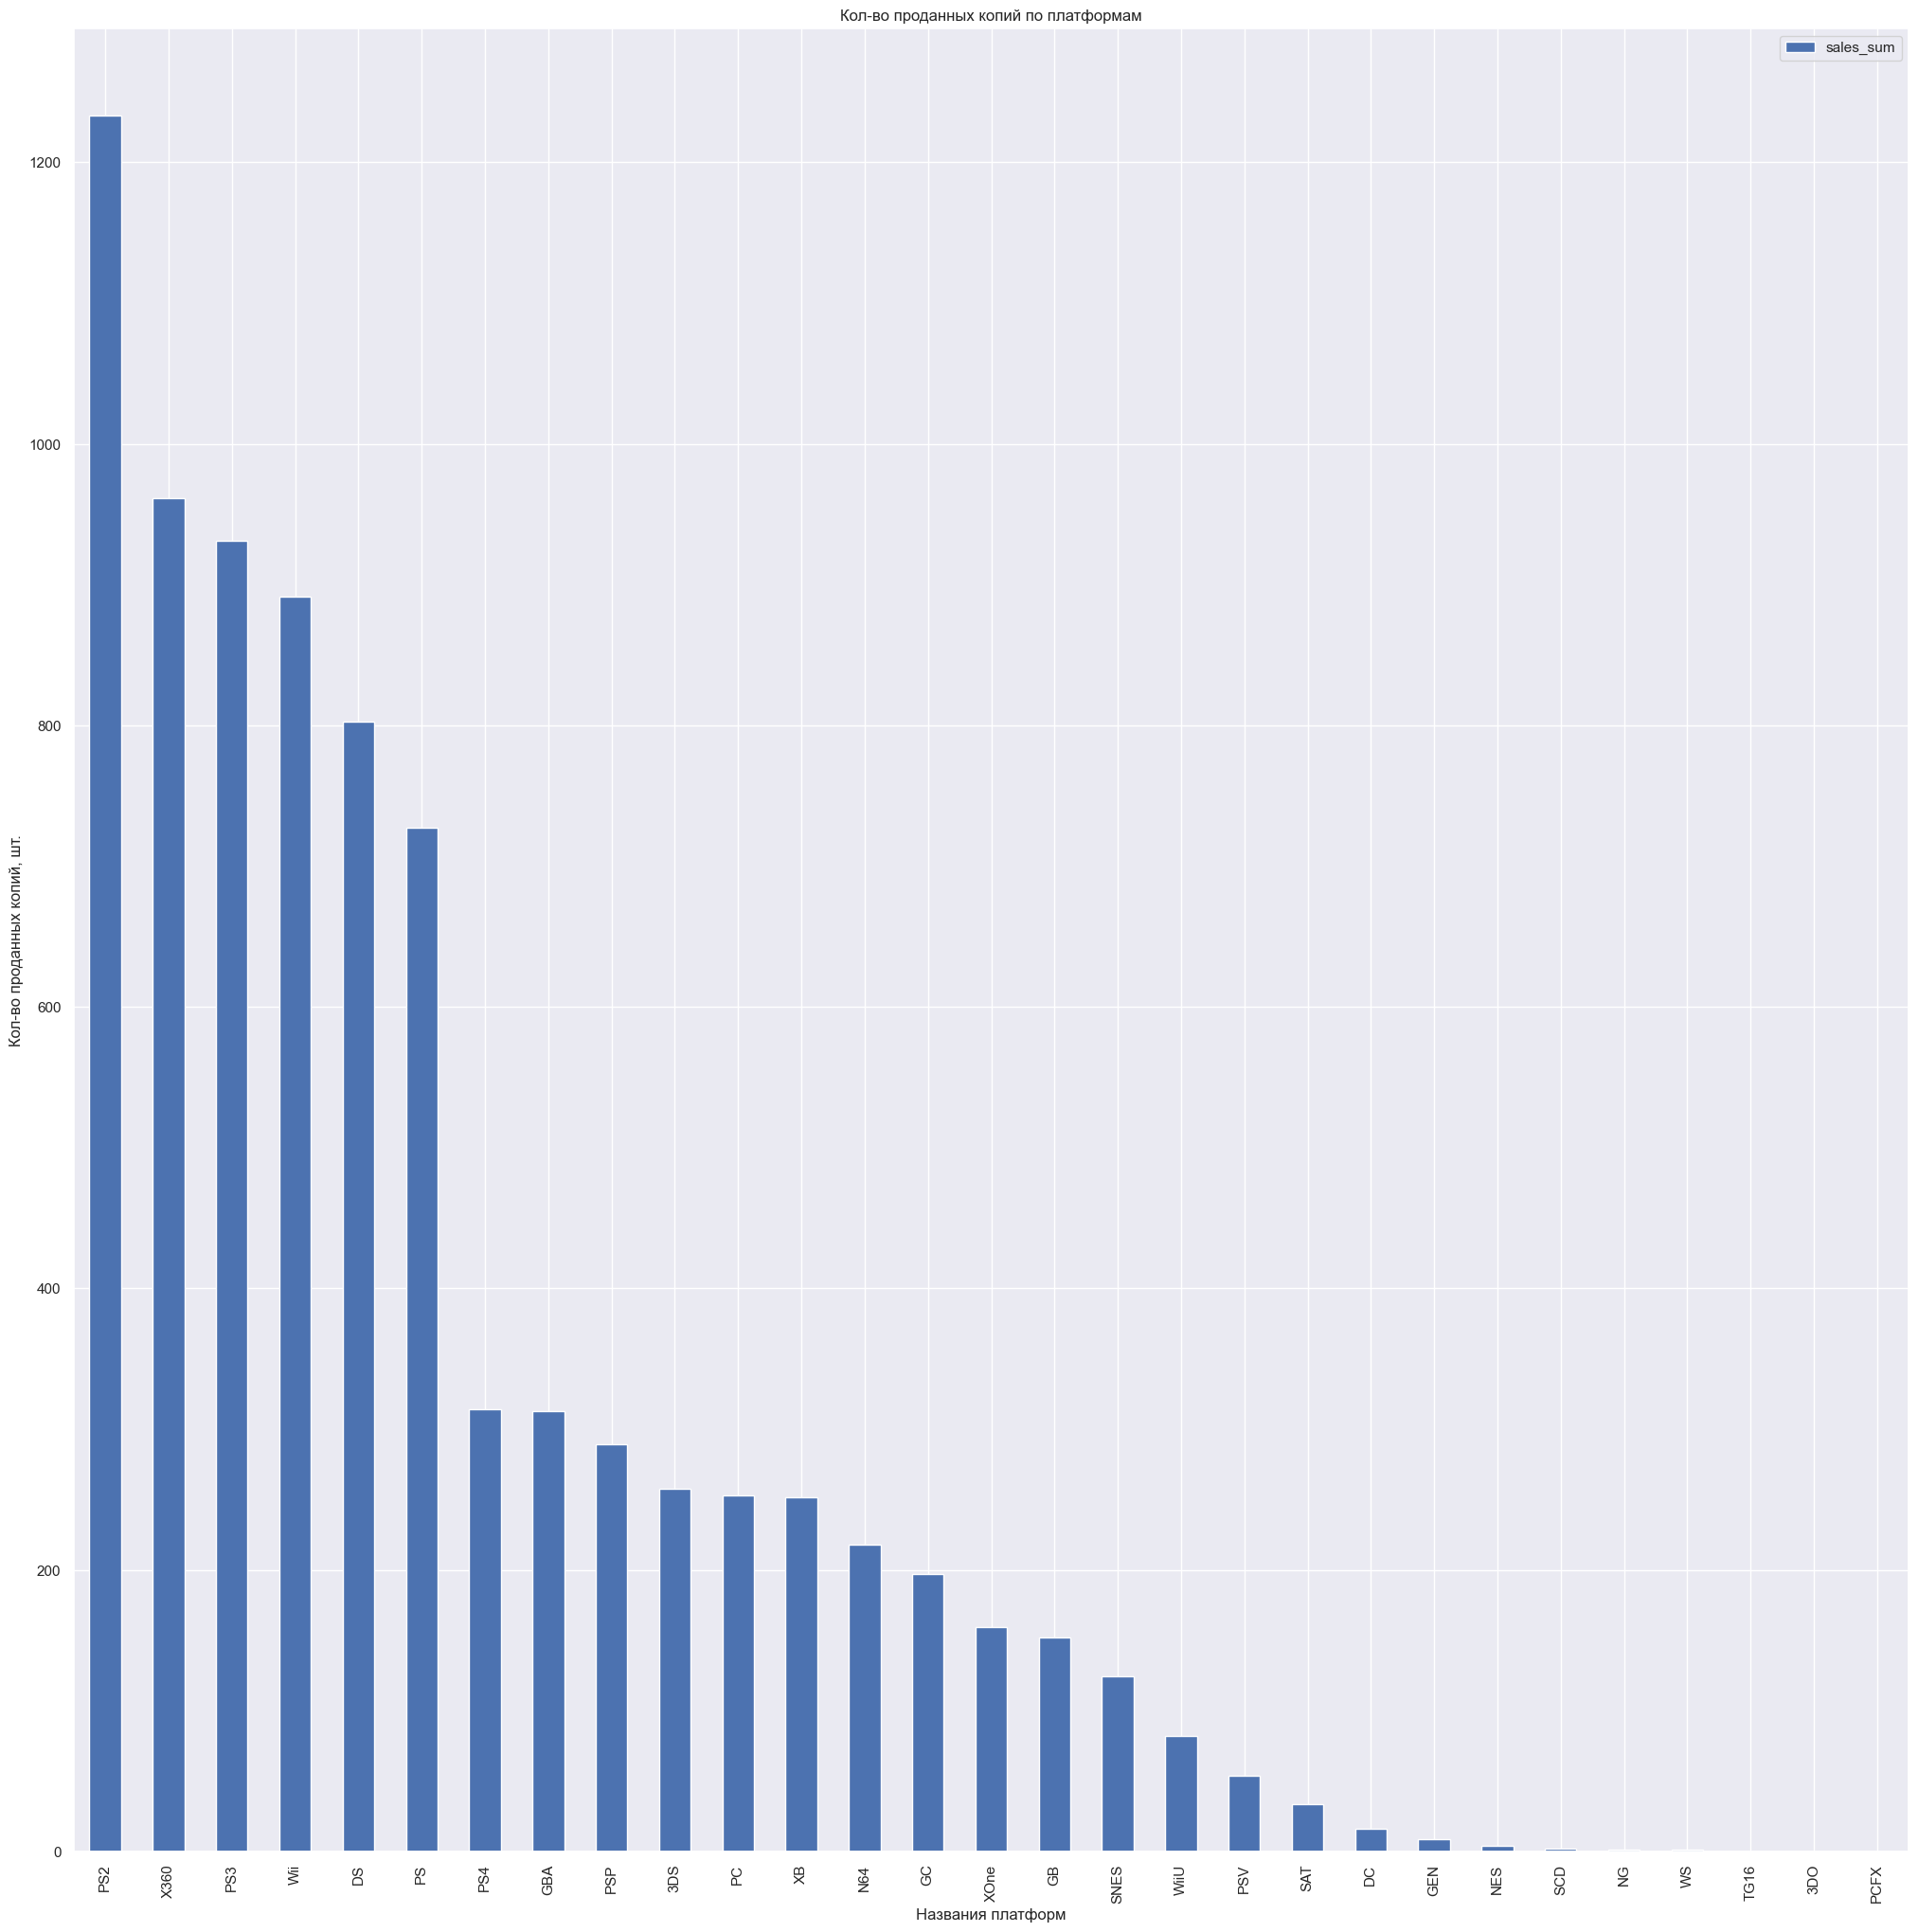

In [159]:
pivot_platform_sales.plot.bar(title='Кол-во проданных копий по платформам', xlabel='Названия платформ', ylabel='Кол-во проданных копий, шт.');

Из диаграммы заметны выделяющиеся фавориты, первые 6 платформ: PS2, X360, PS3, Wii, DS, PS. Рассмотрим распределение продаж по годам для указанных платформ.

In [160]:
#Создаём выборку для указанных платформ:
data_fav_platforms_year=data[data['platform'].isin(['PS2','X360','PS3','Wii','DS','PS'])]

Отобразим на графике Зависимости суммарных продаж по платформам от года.

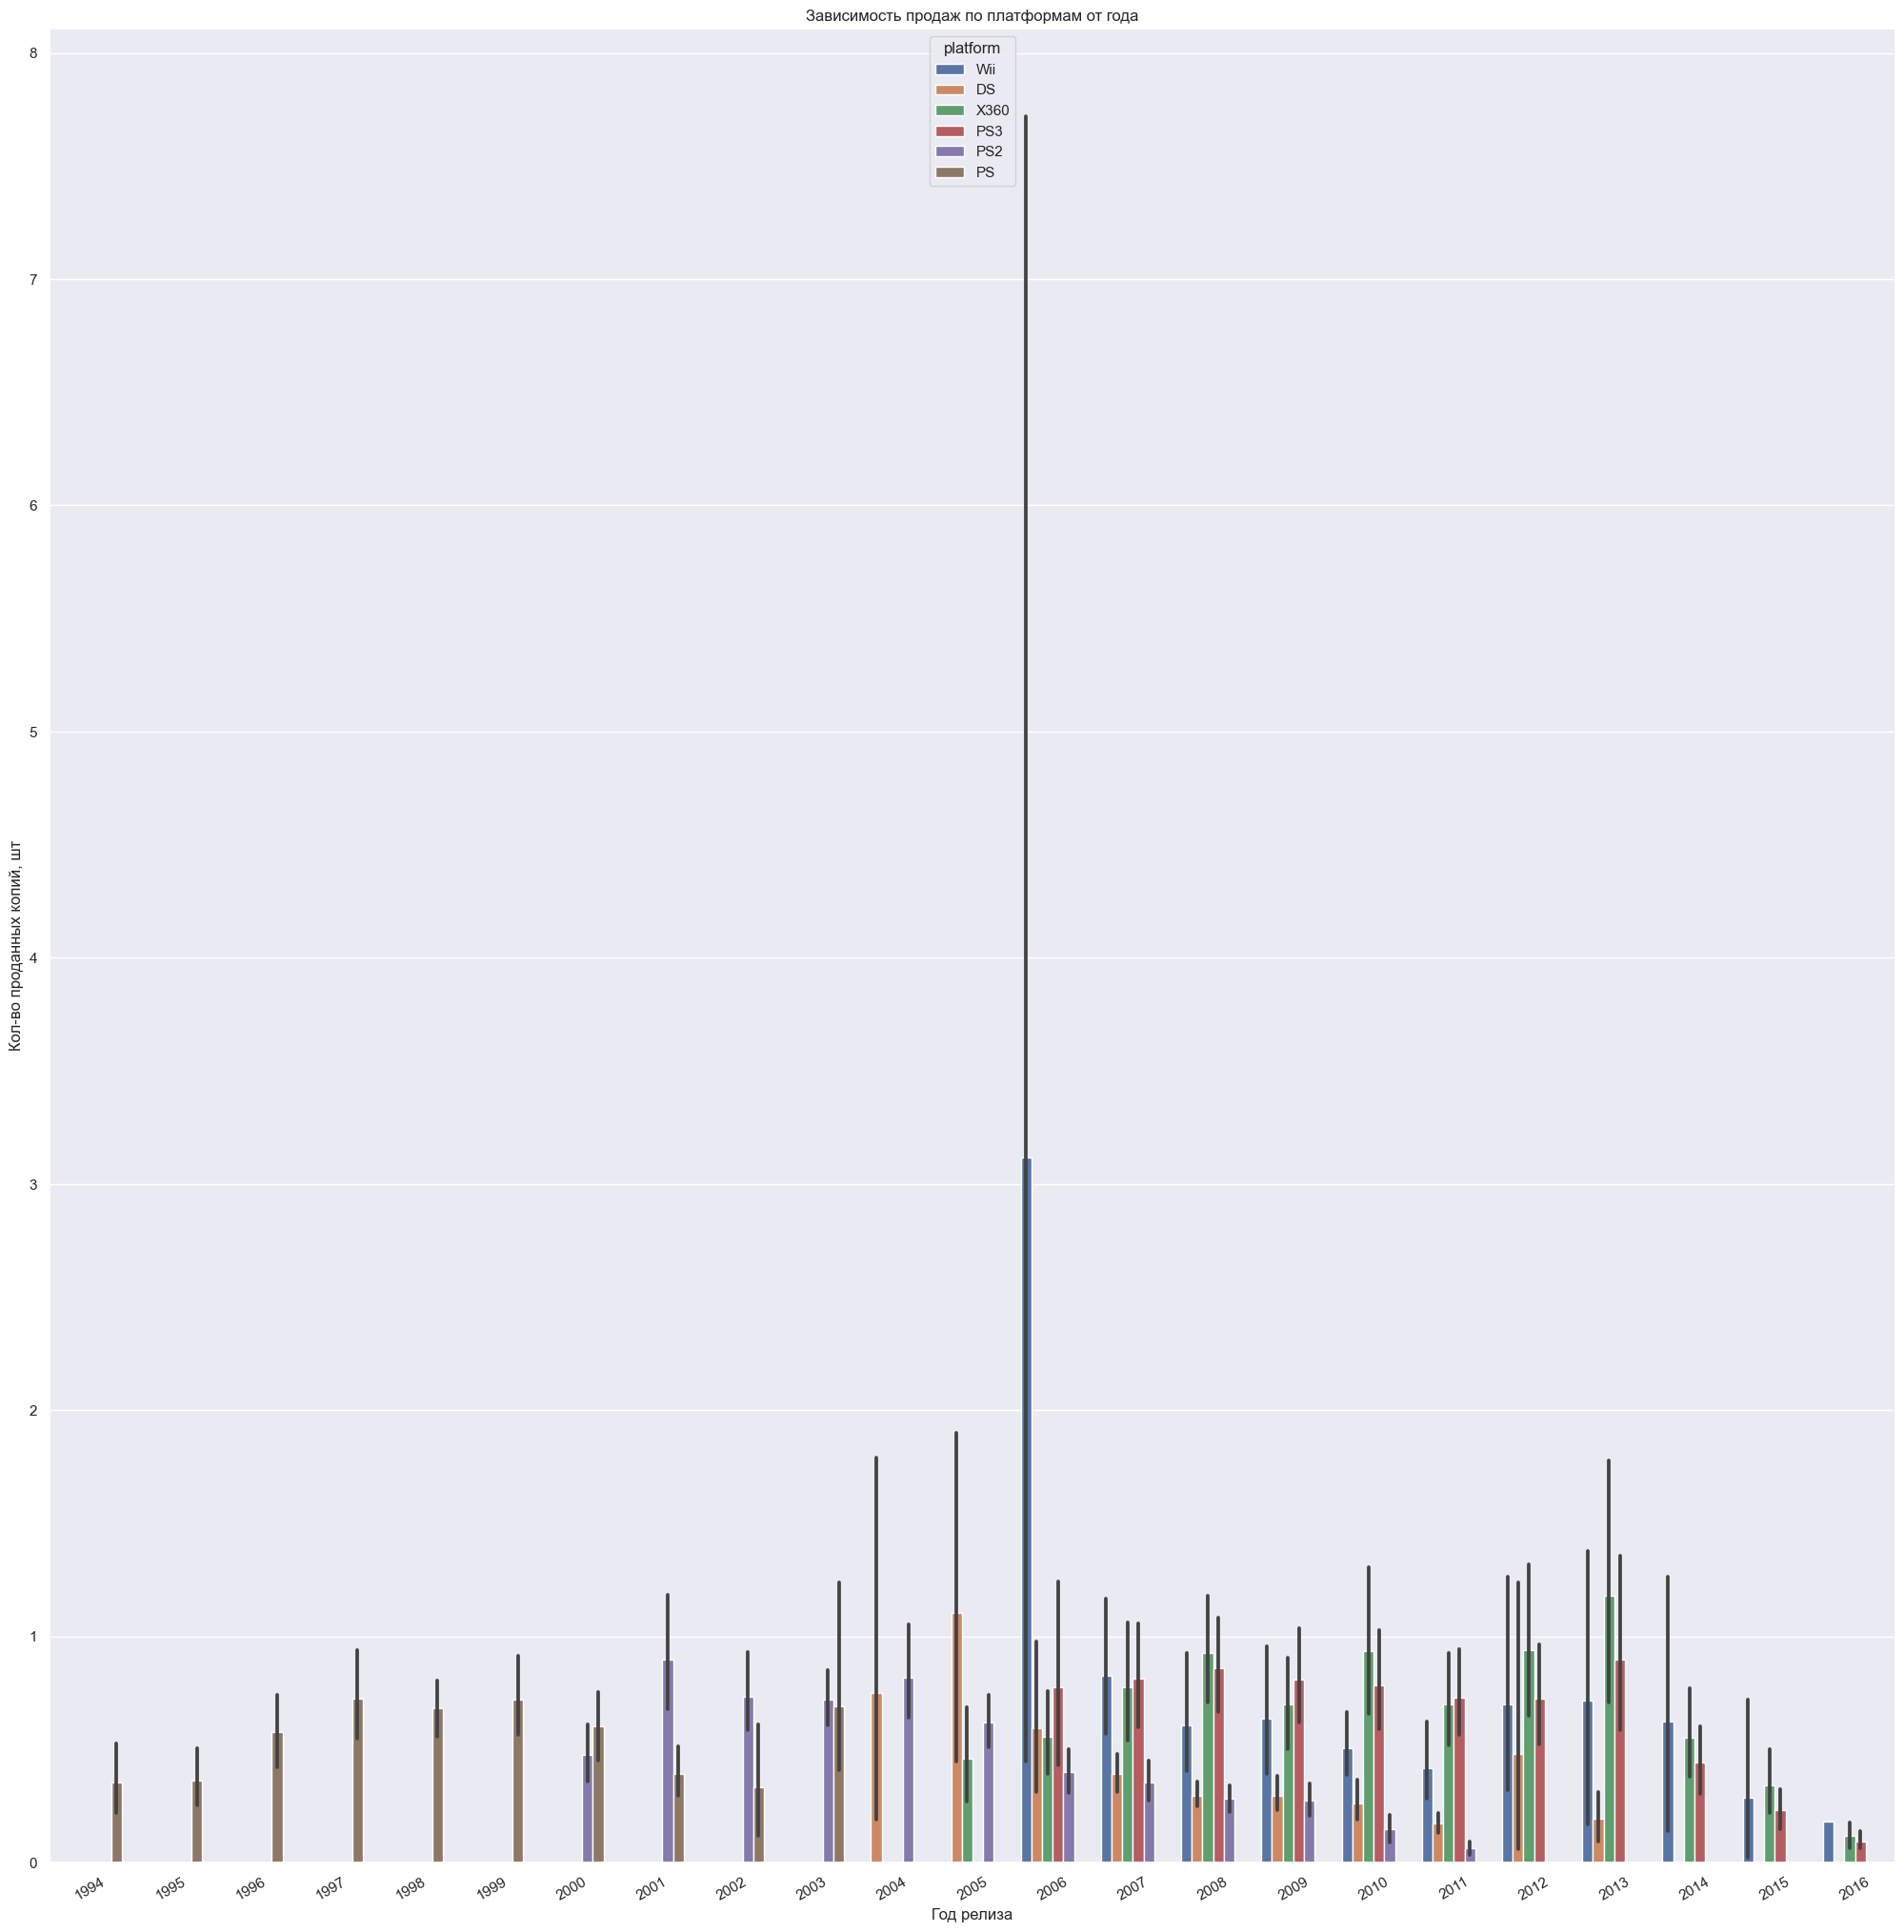

In [161]:
#Отображение графика при помощи библиотеки seaborn
plot=sns.barplot(data=data_fav_platforms_year,x='year_of_release',y='sales_sum',hue='platform');
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30);
plot.set(xlabel='Год релиза', ylabel='Кол-во проданных копий, шт', title='Зависимость продаж по платформам от года');
sns.set(rc = {'figure.figsize':(25,25)})


На построенном графике наглядно видно, как изменялись продажи по платформам: для большинства вначале существует определенный плавный рост, затем плавное снижение (похоже на нормальное распределение). 

Однако, для платформы Wii отображается интересная закономерность: плавного роста не было, зато в первый год работы платформы (2006) имеется максимум продаж, а затем резкое снижение, и в 2011 уже начинается плавный рост и снижение, как на остальных платформах. Это может объясняться или сбоем данных для 2006 года или же особенностью продаж самой платформы на старте или проведенной рекламной кампании. В общем, интересный момент, в который можно было бы углубиться если бы стояла подобная задача.


### 3.3 Отбор данных актуального временного периода (который позволяет сделать прогноз на 2017 год).

Для выбора актуального периода для исследования для прогноза на 2017 год сначала возьмём те платформы, которые вообще поддерживаются на 2016 год:

In [162]:
pivot_platform_sales_year_final[pivot_platform_sales_year_final['max']==2016]

,sales_sum,year_of_release,max
platform,,,
X360,961.24,12,2016
PS3,931.34,11,2016
Wii,891.18,11,2016
PS4,314.14,4,2016
3DS,257.81,6,2016
PC,252.66,23,2016
XOne,159.32,4,2016
WiiU,82.19,5,2016
PSV,53.81,6,2016


С учётом того, что в данном списке есть плтаформы - преемники (X360 - XOne, Wii - WiiU, PS3-PS4), то логично предположить, что для прогноза на будущее есть смысл брать информацию самых последних годах (когда действует самая новая платформа), но по всем работающим в этот момент, так как новые игры будут выпускаться на новые платформы, тогда как на старые в скором времени (особенно для тех, где срок "жизни" уже подходит к 11-12 годам, что является максимум для консолей). То есть нужно взять данные по минимальному значению лет (4), а именно для следующего периода: 2013-2016 гг.

### 3.4 Отброс данных предыдущих лет.

In [163]:
#отброс данных для лет до 2012 включительно и оставление тех платформ, которые активны на 2016 год согласно п.3.3 
data=data[(data['year_of_release']>=2013)&(data['platform'].isin(data[data['year_of_release']==2016]['platform'].unique()))]

### 3.5 Определение лидеров среди платформ по продажам. Отбор потенциально прибыльных платформ.

Необходимо понять, какие платформы лидируют по продажам, а также растут ли продажи или падают.

Определим оставшихся лидеров из актуальных платформ. Рассчитаем сводную таблицу с суммарными продажами за последние 4 года по платформам.

In [164]:
data.pivot_table(index='platform',values='sales_sum',aggfunc='sum').sort_values(by='sales_sum',ascending=False)

,sales_sum
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


По данным расчетам видно, что прослеживается явный топ-5: PS4, PS3, XOne, 3DS, X360. На указанных платформах суммарные продажи велики, больше 100 млн. копий за 4 года.

Теперь проверим на динамику продаж по годам.

In [165]:
#расчитаем сводную таблицу для продаж по платформам год к году
pivot_platform_sales_year_2013_2016=data.pivot_table(index='platform',values='sales_sum',columns='year_of_release',aggfunc='sum')
#вывод таблицы
pivot_platform_sales_year_2013_2016

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSV,10.59,11.90,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60
X360,88.58,34.74,11.96,1.52
XOne,18.96,54.07,60.14,26.15


По таблице видно: несмотря на то, что PS3 является второй по продажам за последние года, количество проданных копий игр для данной плтформы снижается, причем довольно быстро. Это логично: ей на замену пришло новое поколение PS4. Аналогично для X360: быстрое снижение, а XOne показывает рост продаж в 2013-2015 годах. 

Построим график по этим данным для наглядности:

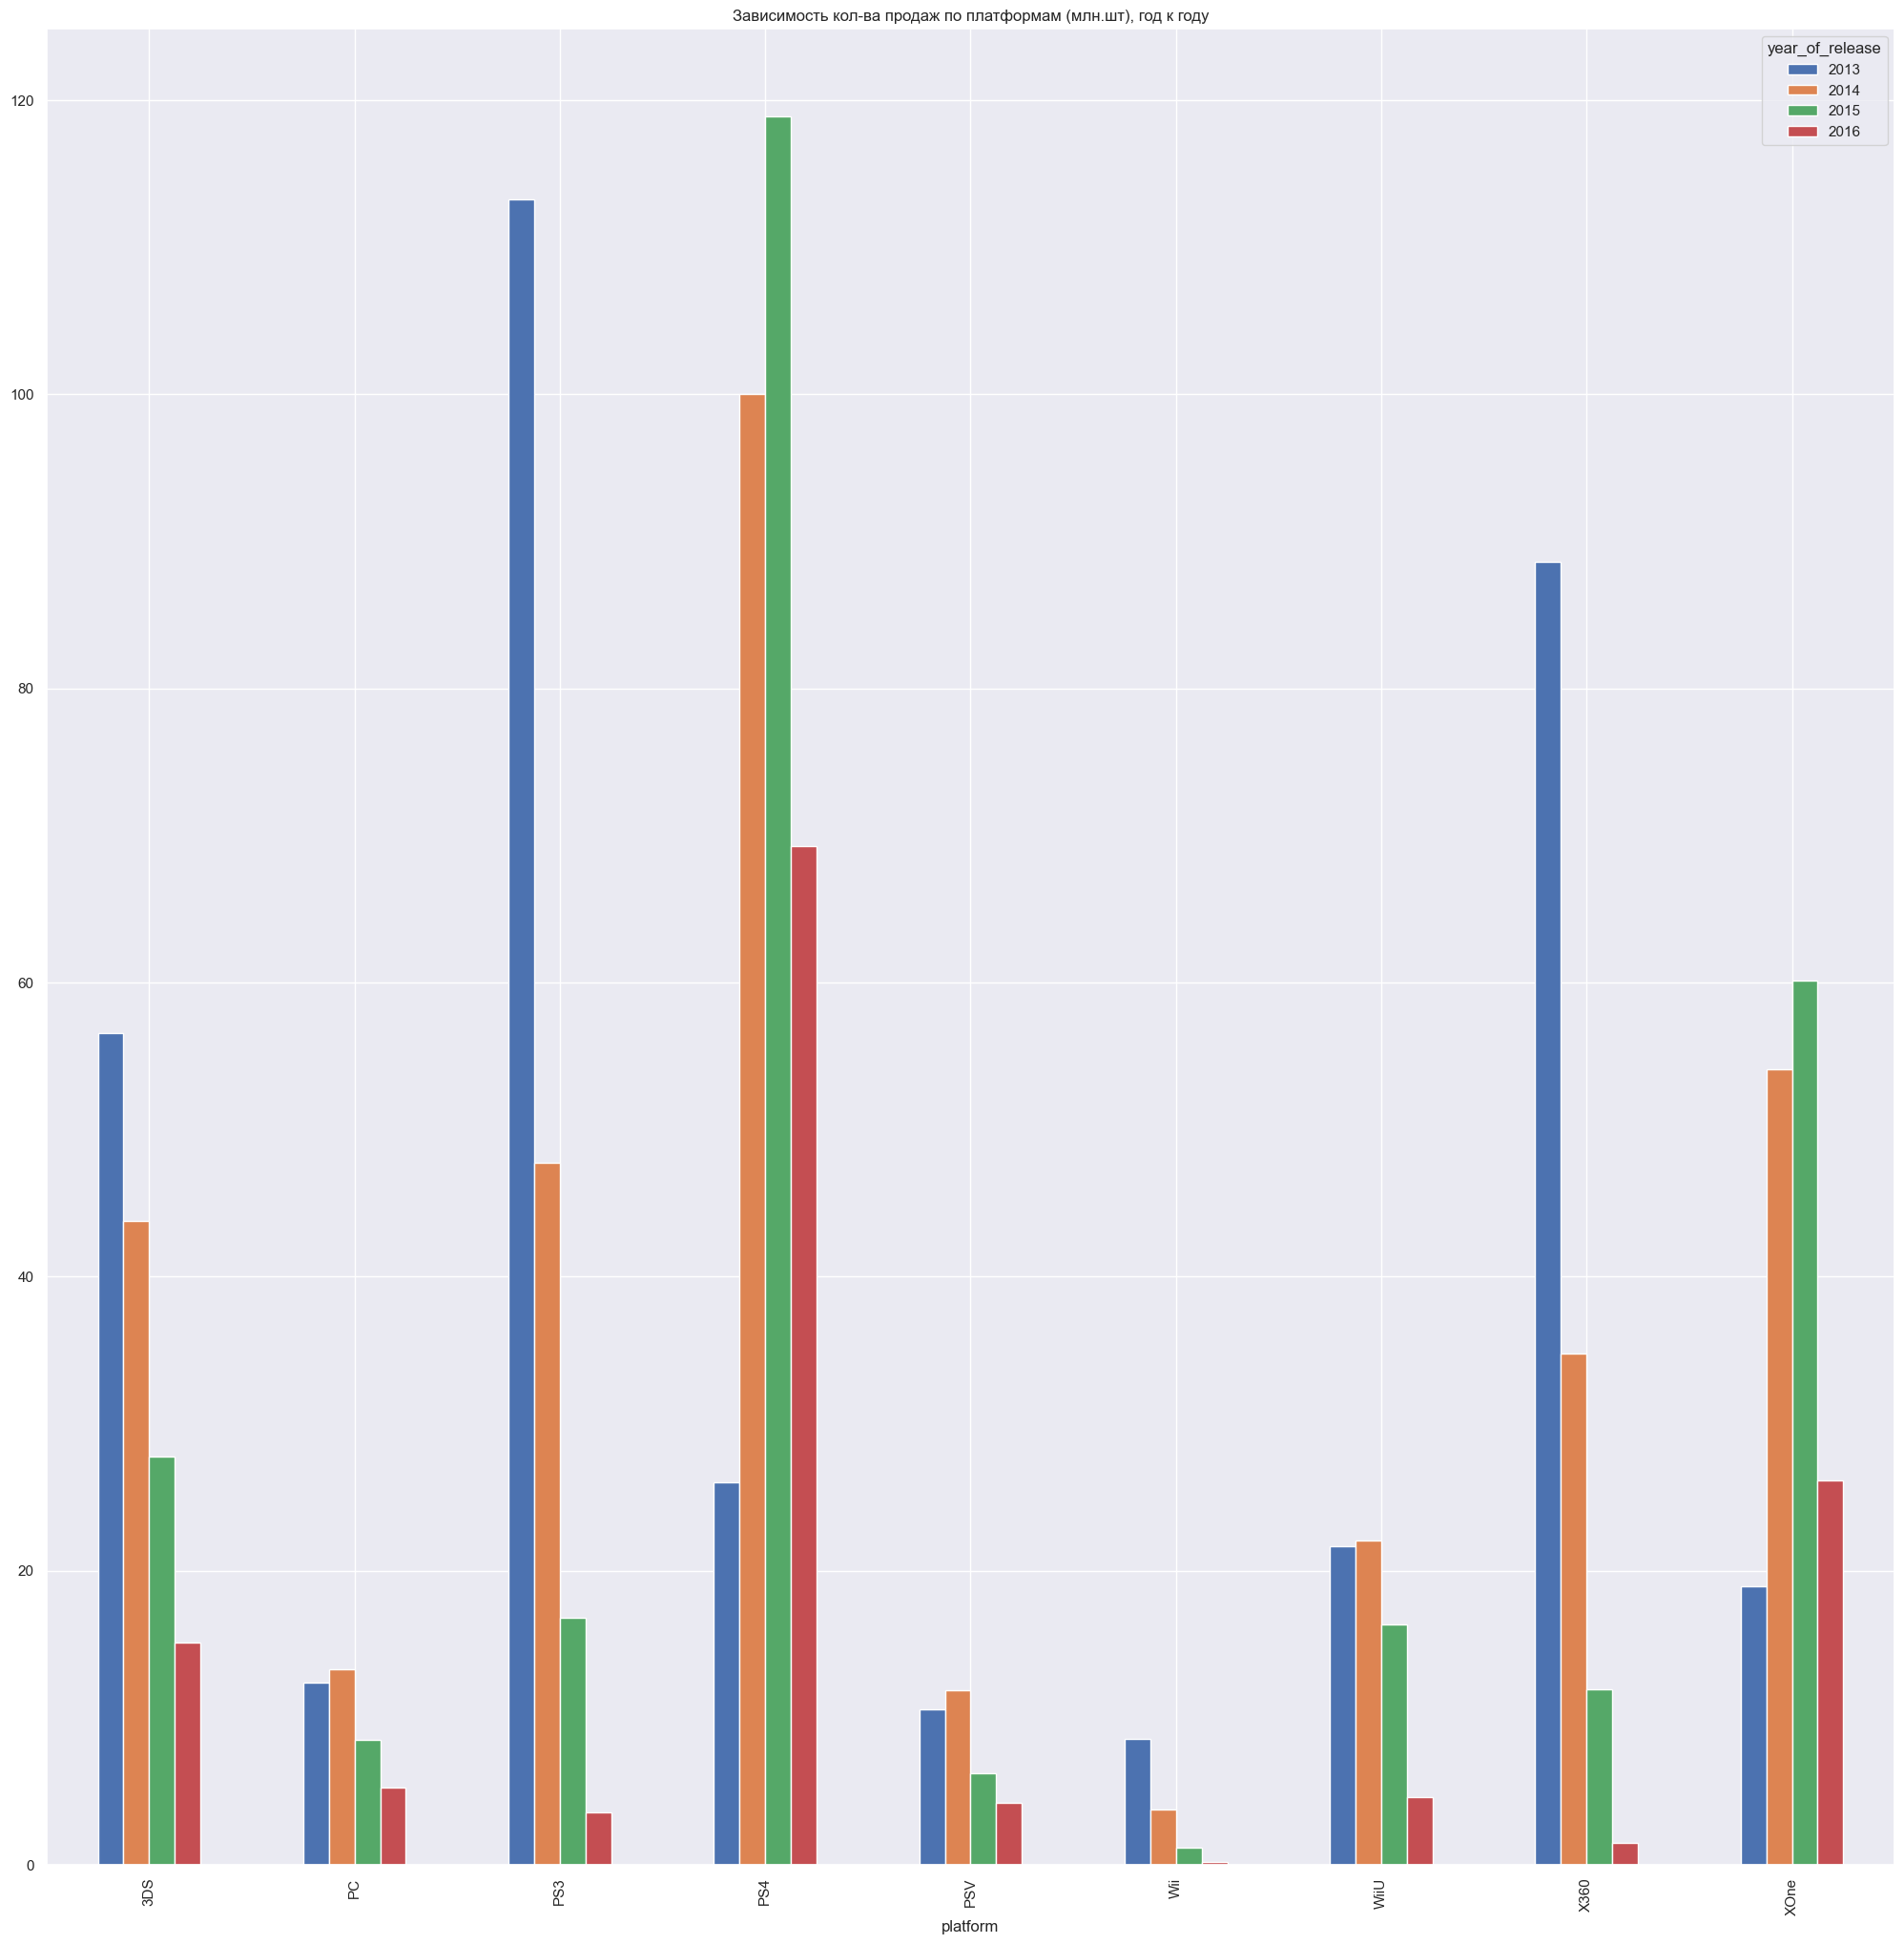

In [166]:
pivot_platform_sales_year_2013_2016.plot.bar(title='Зависимость кол-ва продаж по платформам (млн.шт), год к году');

На графике прослеживаются следующие закономерности. 

Есть платформы, на которых виден резкий спад продаж (эти платформы можно считать точно не прибыльными):

    3DS
    PS3
    Wii
    X360
    
Есть платформы, на которых прослеживается незначительный рост/стабильный спрос в 2013-2014 годах с последующим снижением в 2015-2016 годах (эти платформы можно считать ещё потенциально "работающими пару лет", но роста продаж на них ждать скорее всего не стоит:

    PC
    PSV
    WiiU

И есть платформы со значительным ростом в 2013-2015 годах (их можно считать потенциально прибыльными):

    PS4
    XOne

Стоит принять во внимание важное уточнение: данные по 2016 году могут быть неполными, что значит, что объясняет спад продаж по 2016 году для всех платформ. 

**Из полученных графиков можно однозначно выделить две потенциально прибыльные платформы: это PS4 и XOne.**

### 3.6 Построение графика "ящика с усами" по продажам игр в разбивке по платформам.

Построим диаграмму размаха для суммарных продаж в разбивке по платформам.

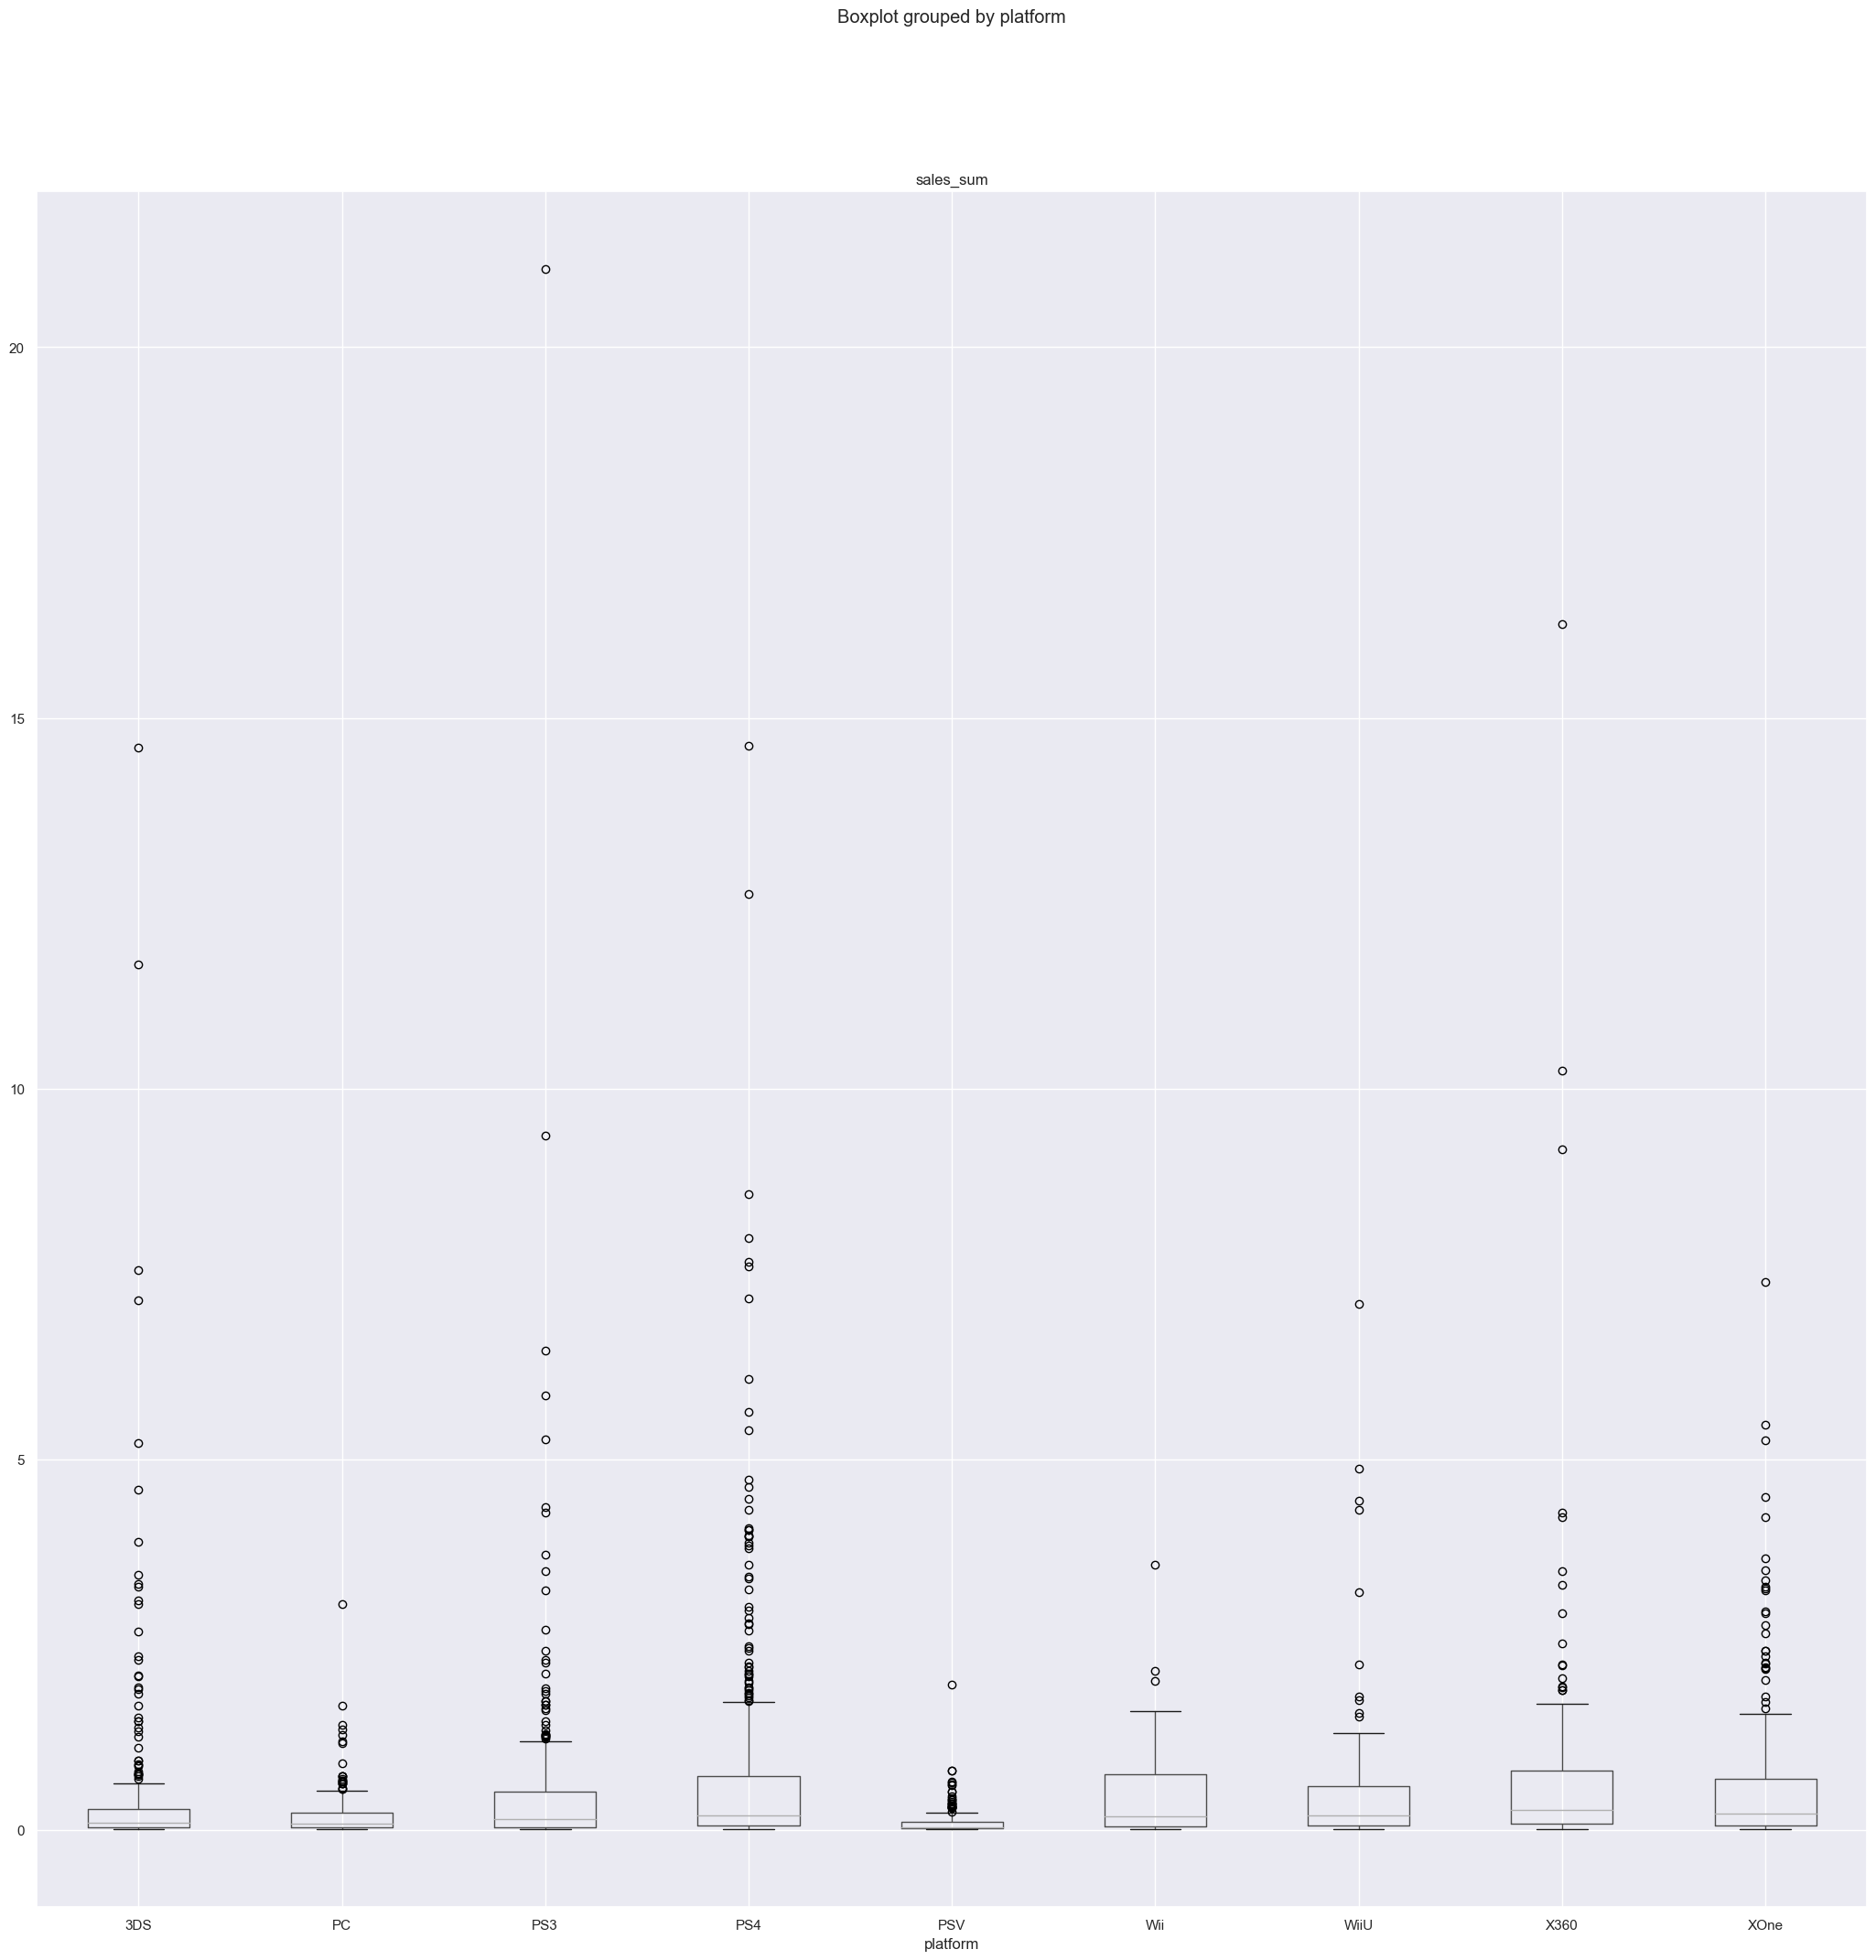

In [167]:
#построение диаграммы размаха
data.boxplot('sales_sum',by='platform');

На данной диаграмме можно предварительно утверждать, что для всех платформ появление выбросов свойственно в бóльшую сторону. 
Также можно  утверждать, что на плафтормах Wii, WiiU значение продаж игр имеют более скученные значения: мало выбросов (каких-то сверхпопулярных единично выстреливающих игр), тогда как в среднем все игры данных платформ имеют более-менее одинаковы нзачения продаж. Рассмотрим диаграмму поближе, ограничив отображение верхней границы:

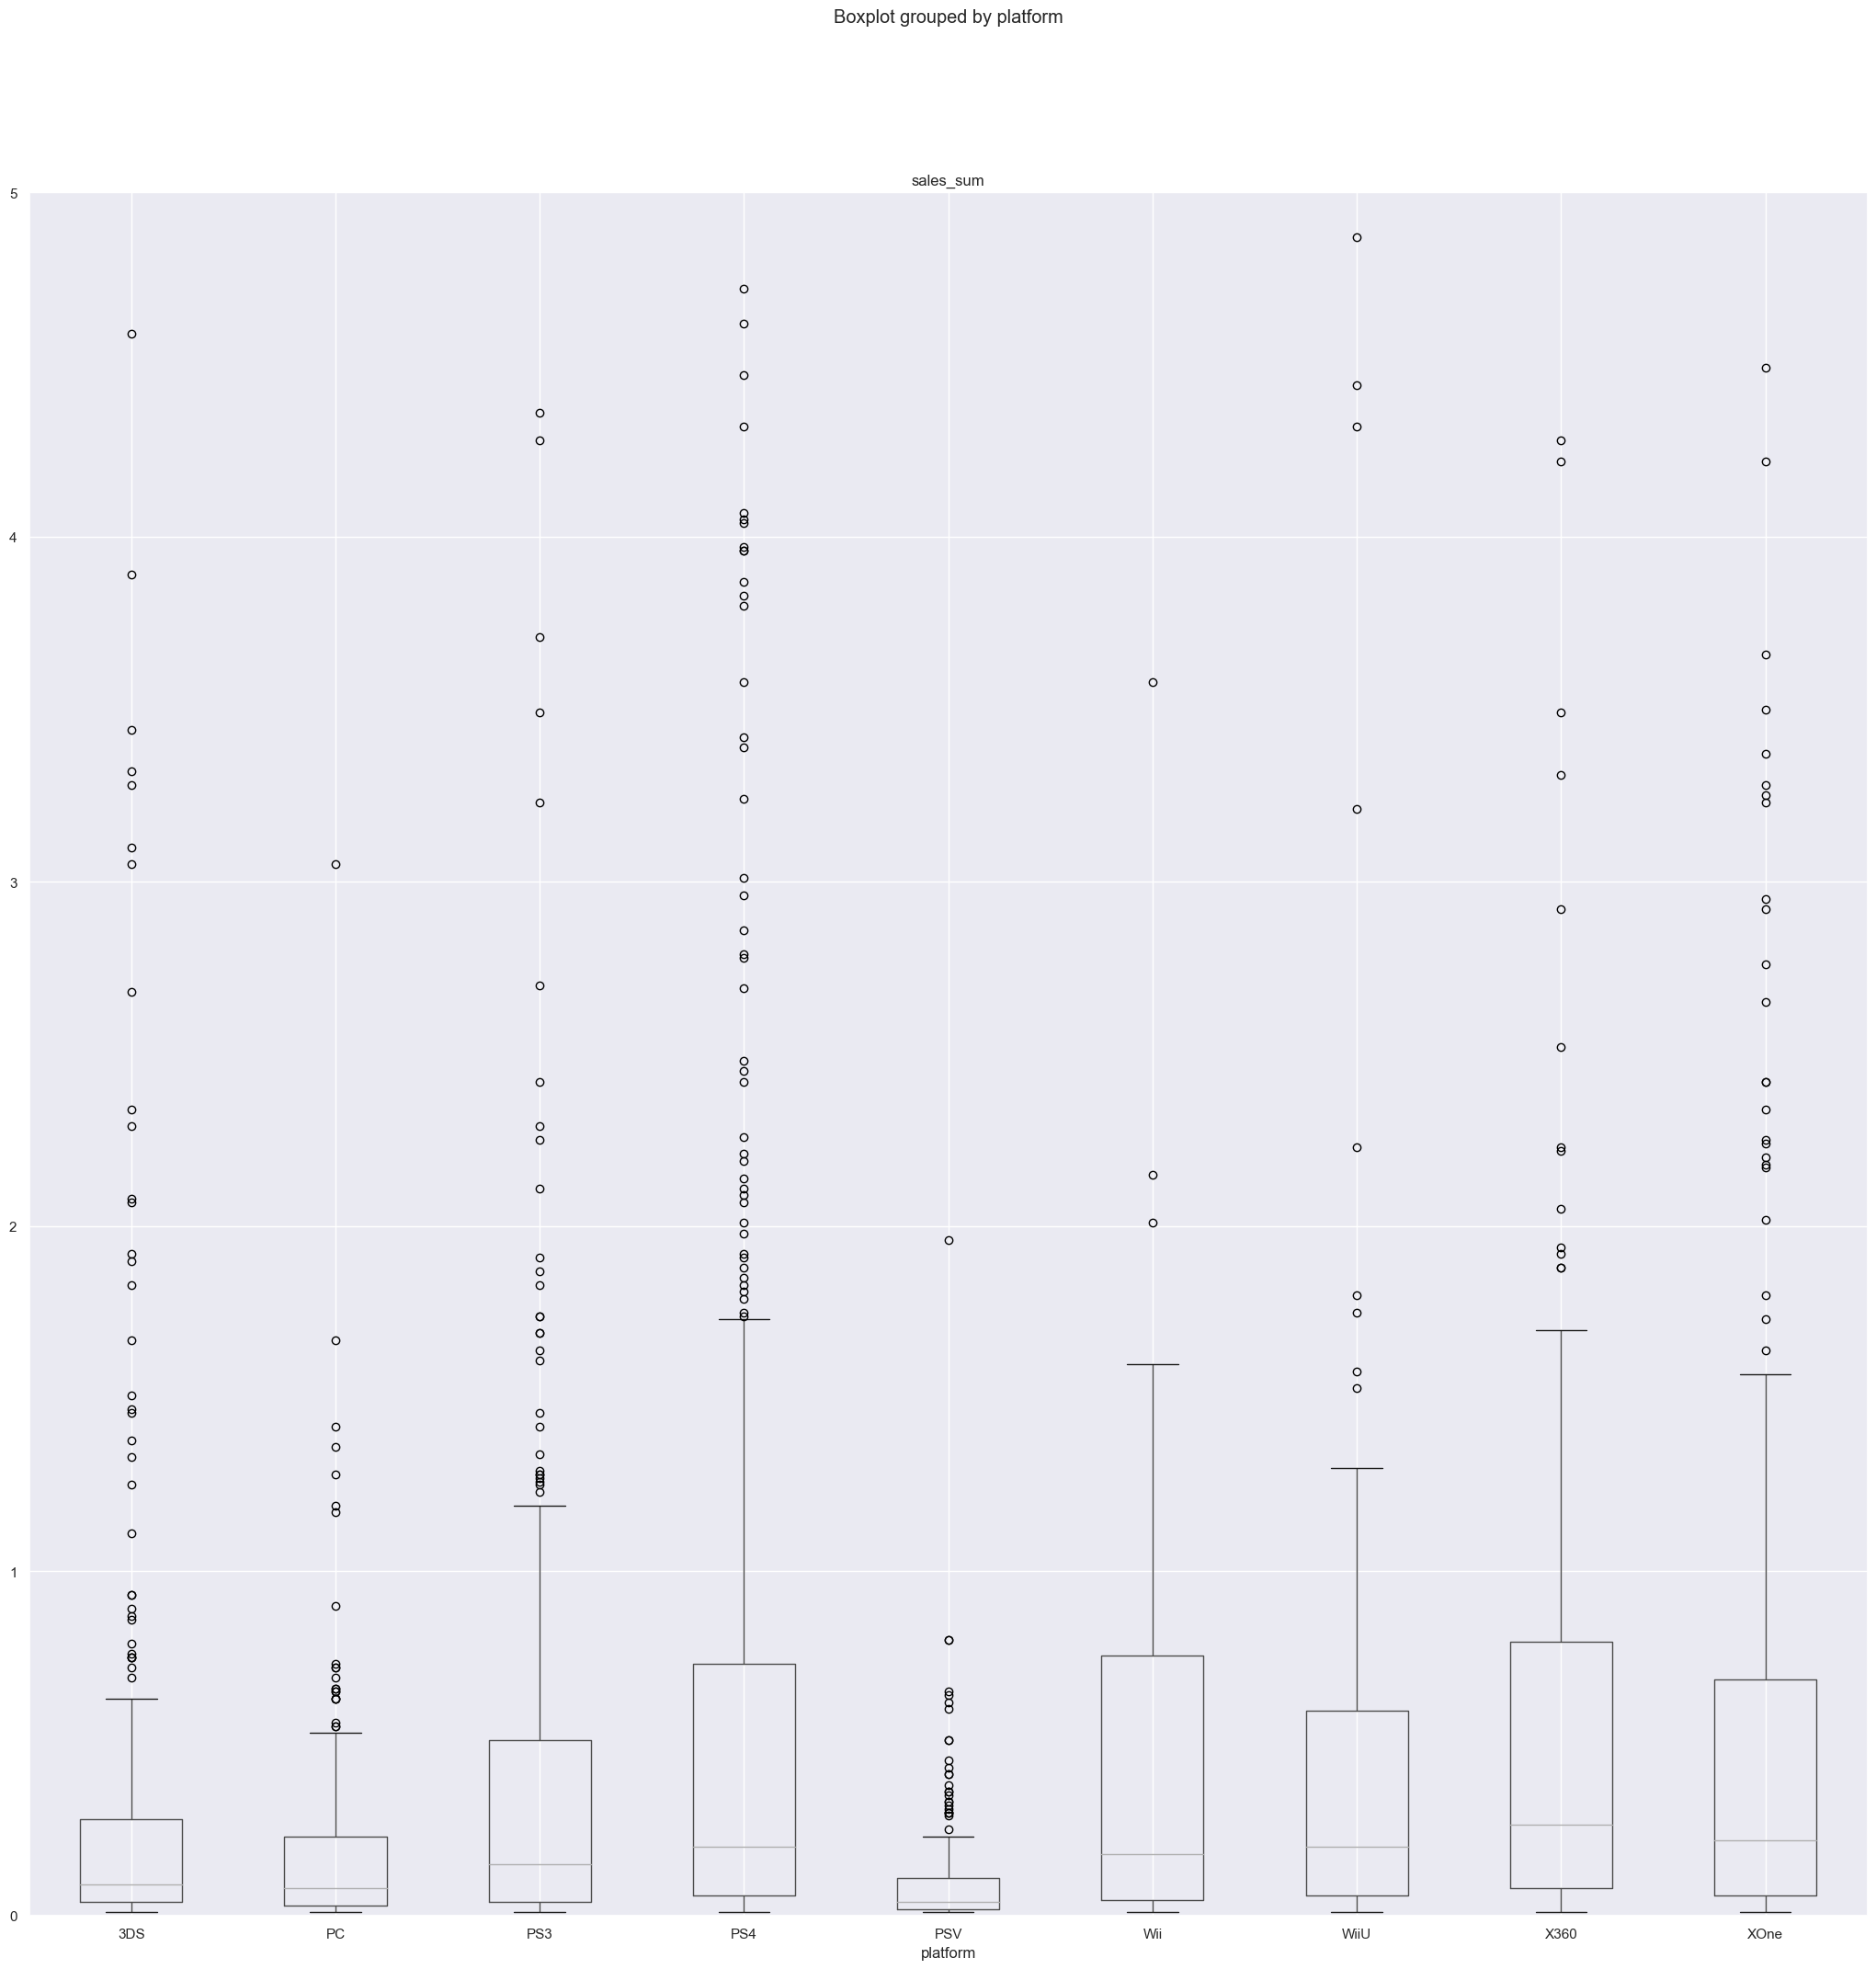

In [168]:
#построение диаграммы размаха
data.boxplot('sales_sum',by='platform');
#ограничение верхней границы
plt.ylim(0,5);

На более близком масштабе заметна тенденция к сравнительно меньшему количеству сверхпопулярных выбросов (как и у Wii, WiiU) - для платформы X360. Тогда как остальные всё также имеют значимое количество популярных игр, отличающихся от основной массы игр на платформе.

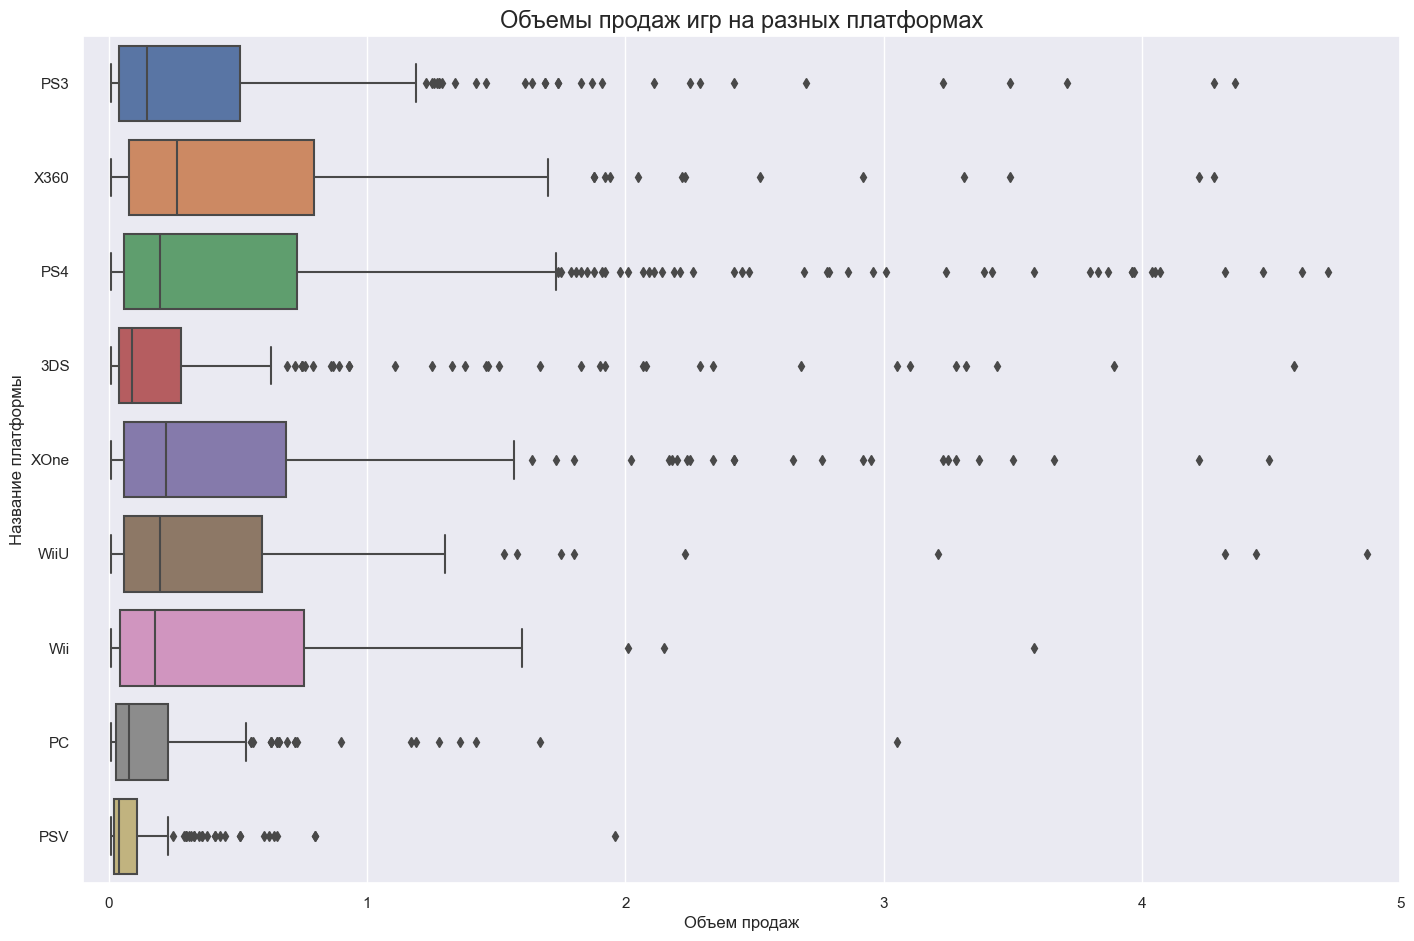

In [169]:
# код ревьюера
plt.figure(figsize=(17, 11))
sns.boxplot(data=data, y='platform', x='sales_sum')
plt.xlim(-0.1, 5)

plt.title('Объемы продаж игр на разных платформах', size=17)
plt.xlabel('Объем продаж', size=12)
plt.ylabel('Название платформы', size=12)

plt.show()

### 3.7 Исследование влияния на продажи внутри одной из платформ отзывы пользователей и критиков.

Для исследования возьмем наиболее популярную за последнее время платформу - PS4. Сначала построим диаграмму рассеяния суммарные продажи - оценки критиков.

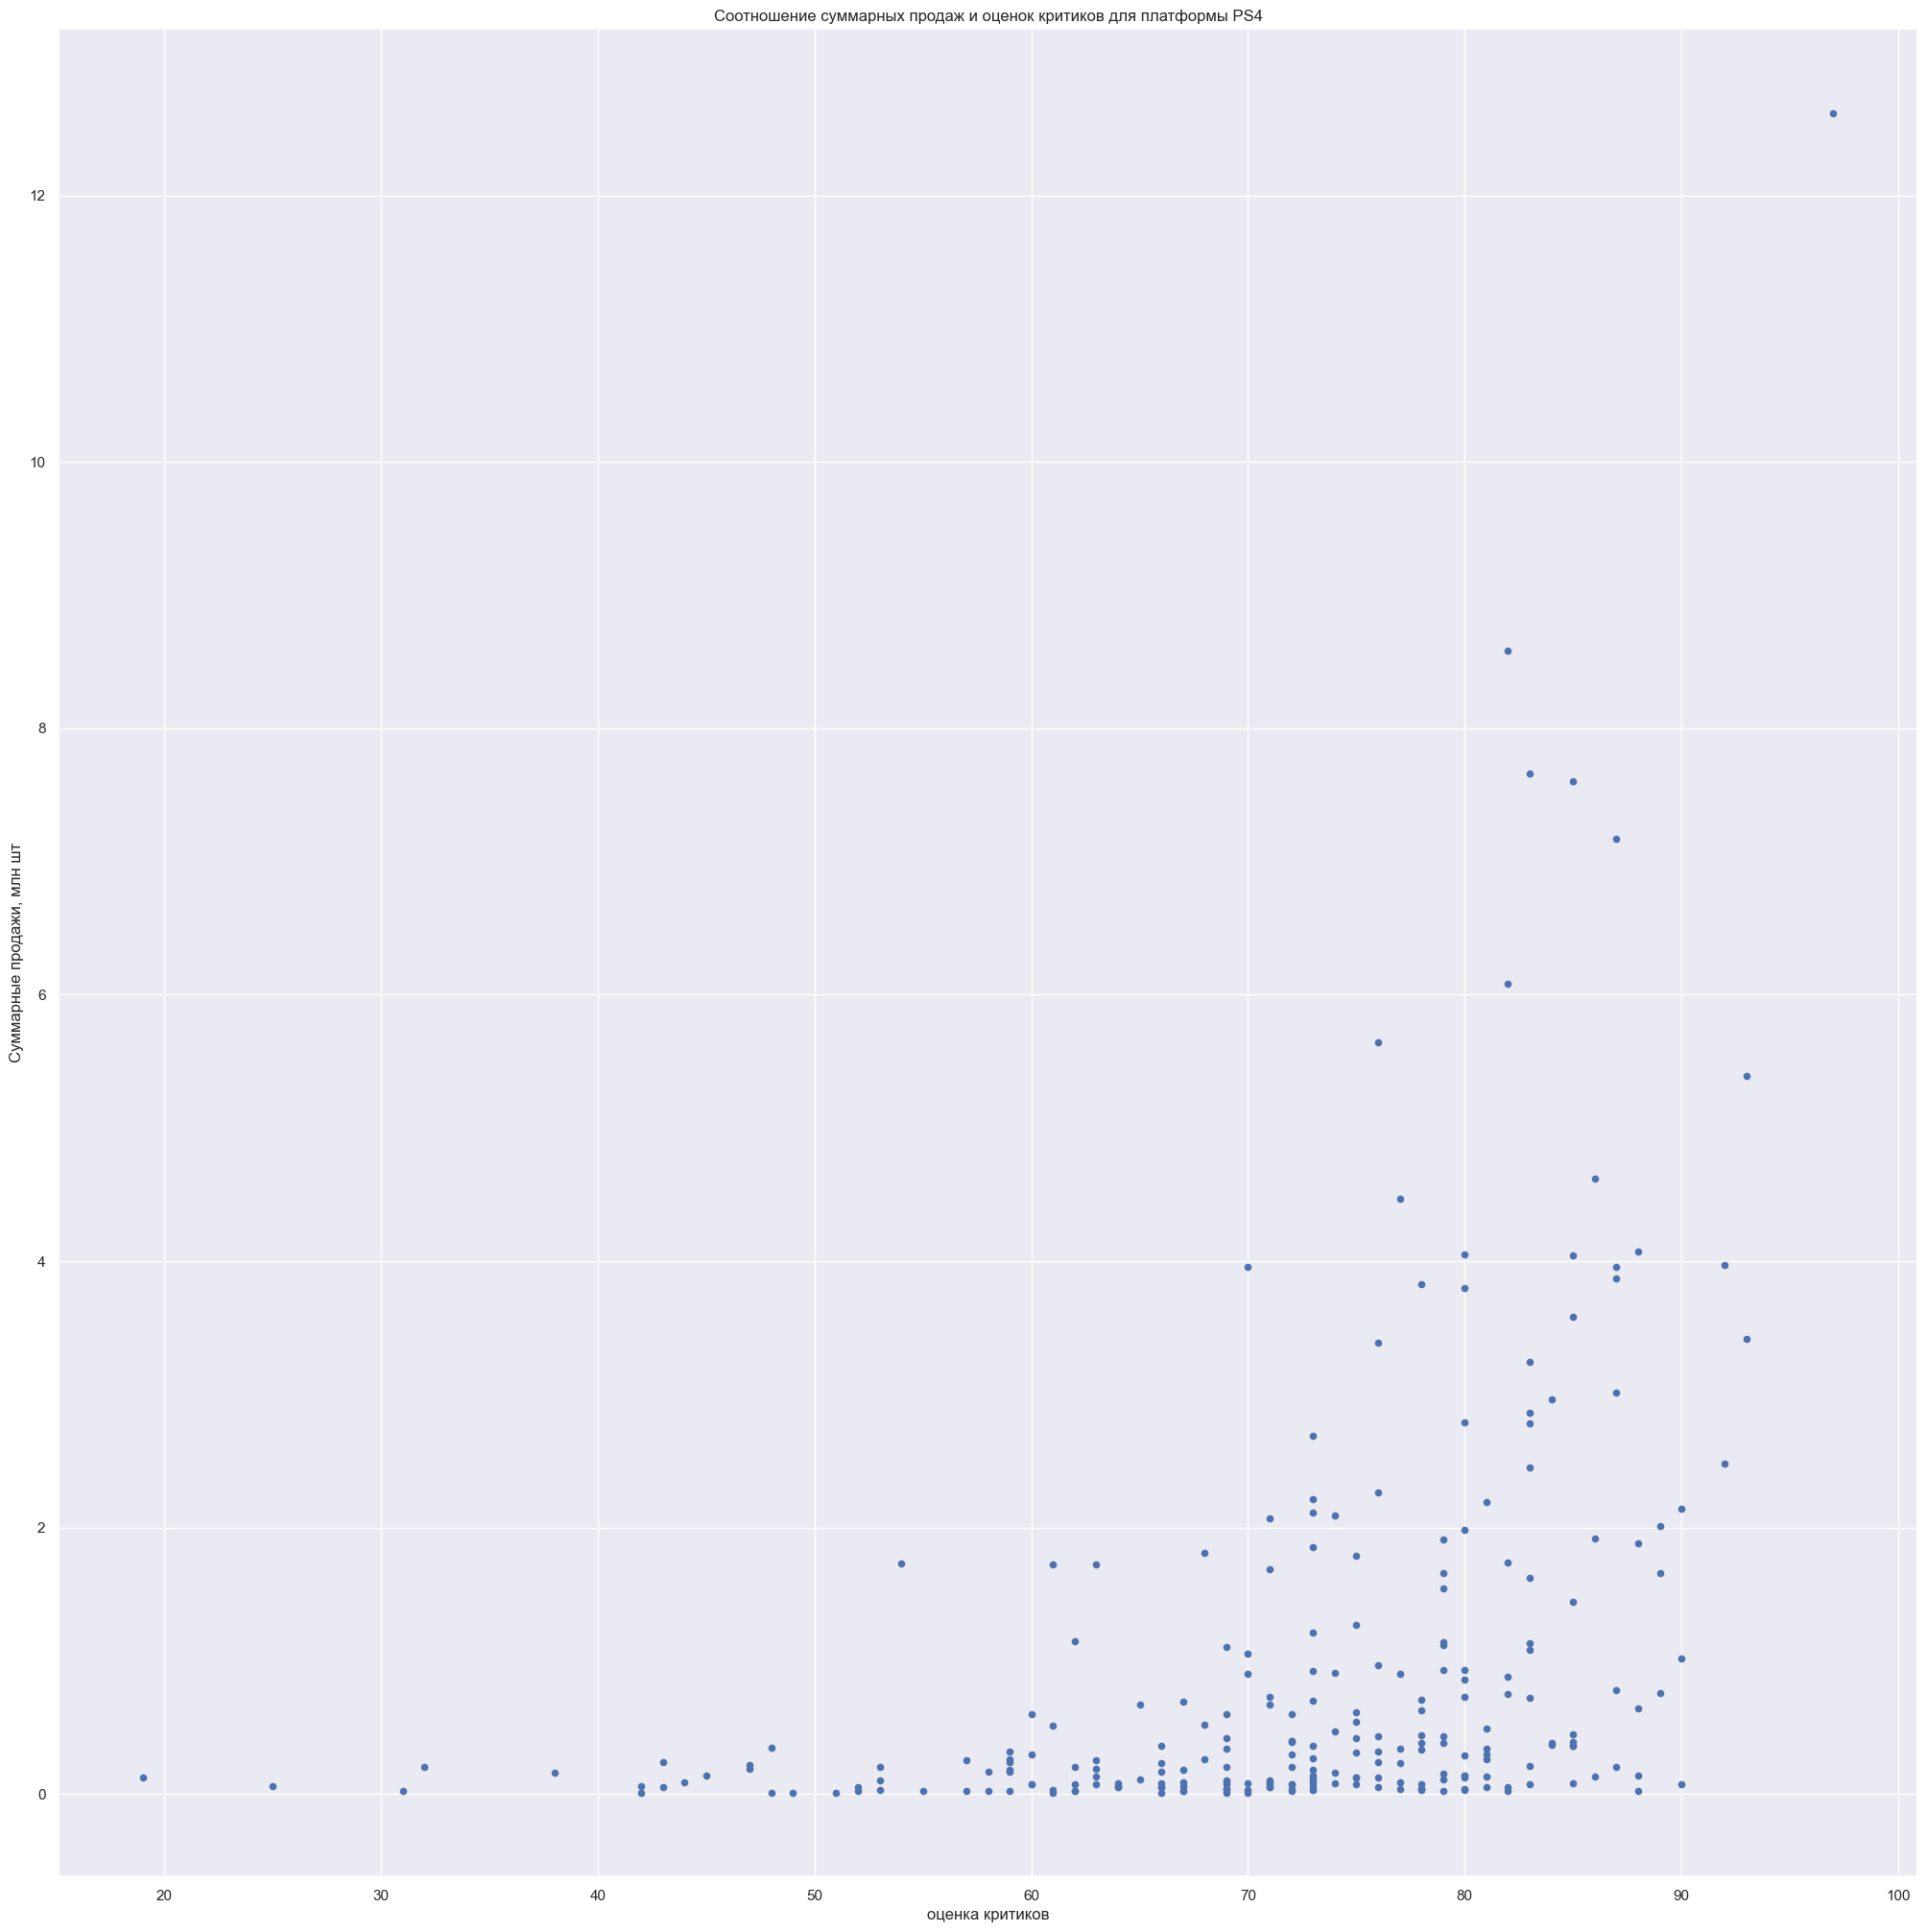

In [170]:
data[data['platform']=='PS4'].plot(x='critic_score',y='sales_sum',\
kind='scatter', title='Cоотношение суммарных продаж и оценок критиков для платформы PS4',\
xlabel='оценка критиков', ylabel='Суммарные продажи, млн шт');

Есть ощущение, что для данной платформы существует зависимость: чем выше оценки критиков, тем больше продаж. Посчитаем коэффициент корреляции между этими величинами.

In [171]:
data[data['platform']=='PS4']['sales_sum'].corr(data[data['platform']=='PS4']['critic_score'].astype('float64'))

0.40656790206178145

Действительно, данное значение коэффициента корреляции свидетельствует о наличии прямой (но не однозначно линейной) зависимости между оценками критиков и продажам.

### 3.8 Соотнесение с продажами игр на других платформах.

Посмотрим на корреляции по другим платформам для оценки критиков - продажи:

In [172]:
data.groupby('platform')['sales_sum'].corr(data['critic_score'].astype('float64'))

platform
3DS     0.357057
PC      0.196030
PS3     0.334285
PS4     0.406568
PSV     0.254742
Wii          NaN
WiiU    0.376415
X360    0.350345
XOne    0.416998
Name: sales_sum, dtype: float64

Из данных видно следующее: в принципе для всех платформ наблюдается прямая зависимость где-то сильнее (максимум для XOne 0.41), где-то слабее (минимум для PC 0.19). Также нельзя сделать подобный вывод для платформы Wii: видимо для этой платформы не были подгружены оценки критиков (или оценок вовсе не было).

Посмотрим на корреляции по другим платформам для оценки игроков - продажи:

In [173]:
data.groupby('platform')['sales_sum'].corr(data['user_score'].astype('float64'))

platform
3DS     0.241504
PC     -0.093842
PS3     0.002394
PS4    -0.031957
PSV     0.000942
Wii     0.682942
WiiU    0.419330
X360   -0.011742
XOne   -0.068925
Name: sales_sum, dtype: float64

Здесь поинтереснее зависимости, можно выделить следующие группы:

Платформы, на которых продажи почти не зависят от оценок игроков: PC, PS3, PS4, PSV, X360 и XOne

Платформы, на которых продажи зависят пропорционально оценкам игроков, причём значительно: Wii и WiiU.

Это может свидетельствовать например о том, что на платформах Wii и WiiU очень хорошо сделан сервис оценок, получаемых от игроков, и данному сервису доверяют люди при покупке игры. Или же рекламные кампании (или отображение игр в основном каталоге) сортируются по рейтингу, полученному от игроков. В любом случае, можно утверждать: на платформах Wii и WiiU сервис оценок игроков сделан иначе, чем на остальных платформах.

### 3.9 Исследование распределения игр по жанрам.

Обратим внимание на распределение игр по жанрам:

In [174]:
#группировка суммы столбца с продажами по жанрам
data.groupby('genre')['sales_sum'].sum()

genre
Action          320.51
Adventure        22.90
Fighting         35.29
Misc             62.57
Platform         41.94
Puzzle            3.17
Racing           39.89
Role-Playing    144.86
Shooter         232.98
Simulation       21.55
Sports          149.93
Strategy         10.06
Name: sales_sum, dtype: float64

По данным видно, что есть выделяющиеся жанры, а есть группа жанров, не сильно продающихся. Построим диаграмму для наглядности:

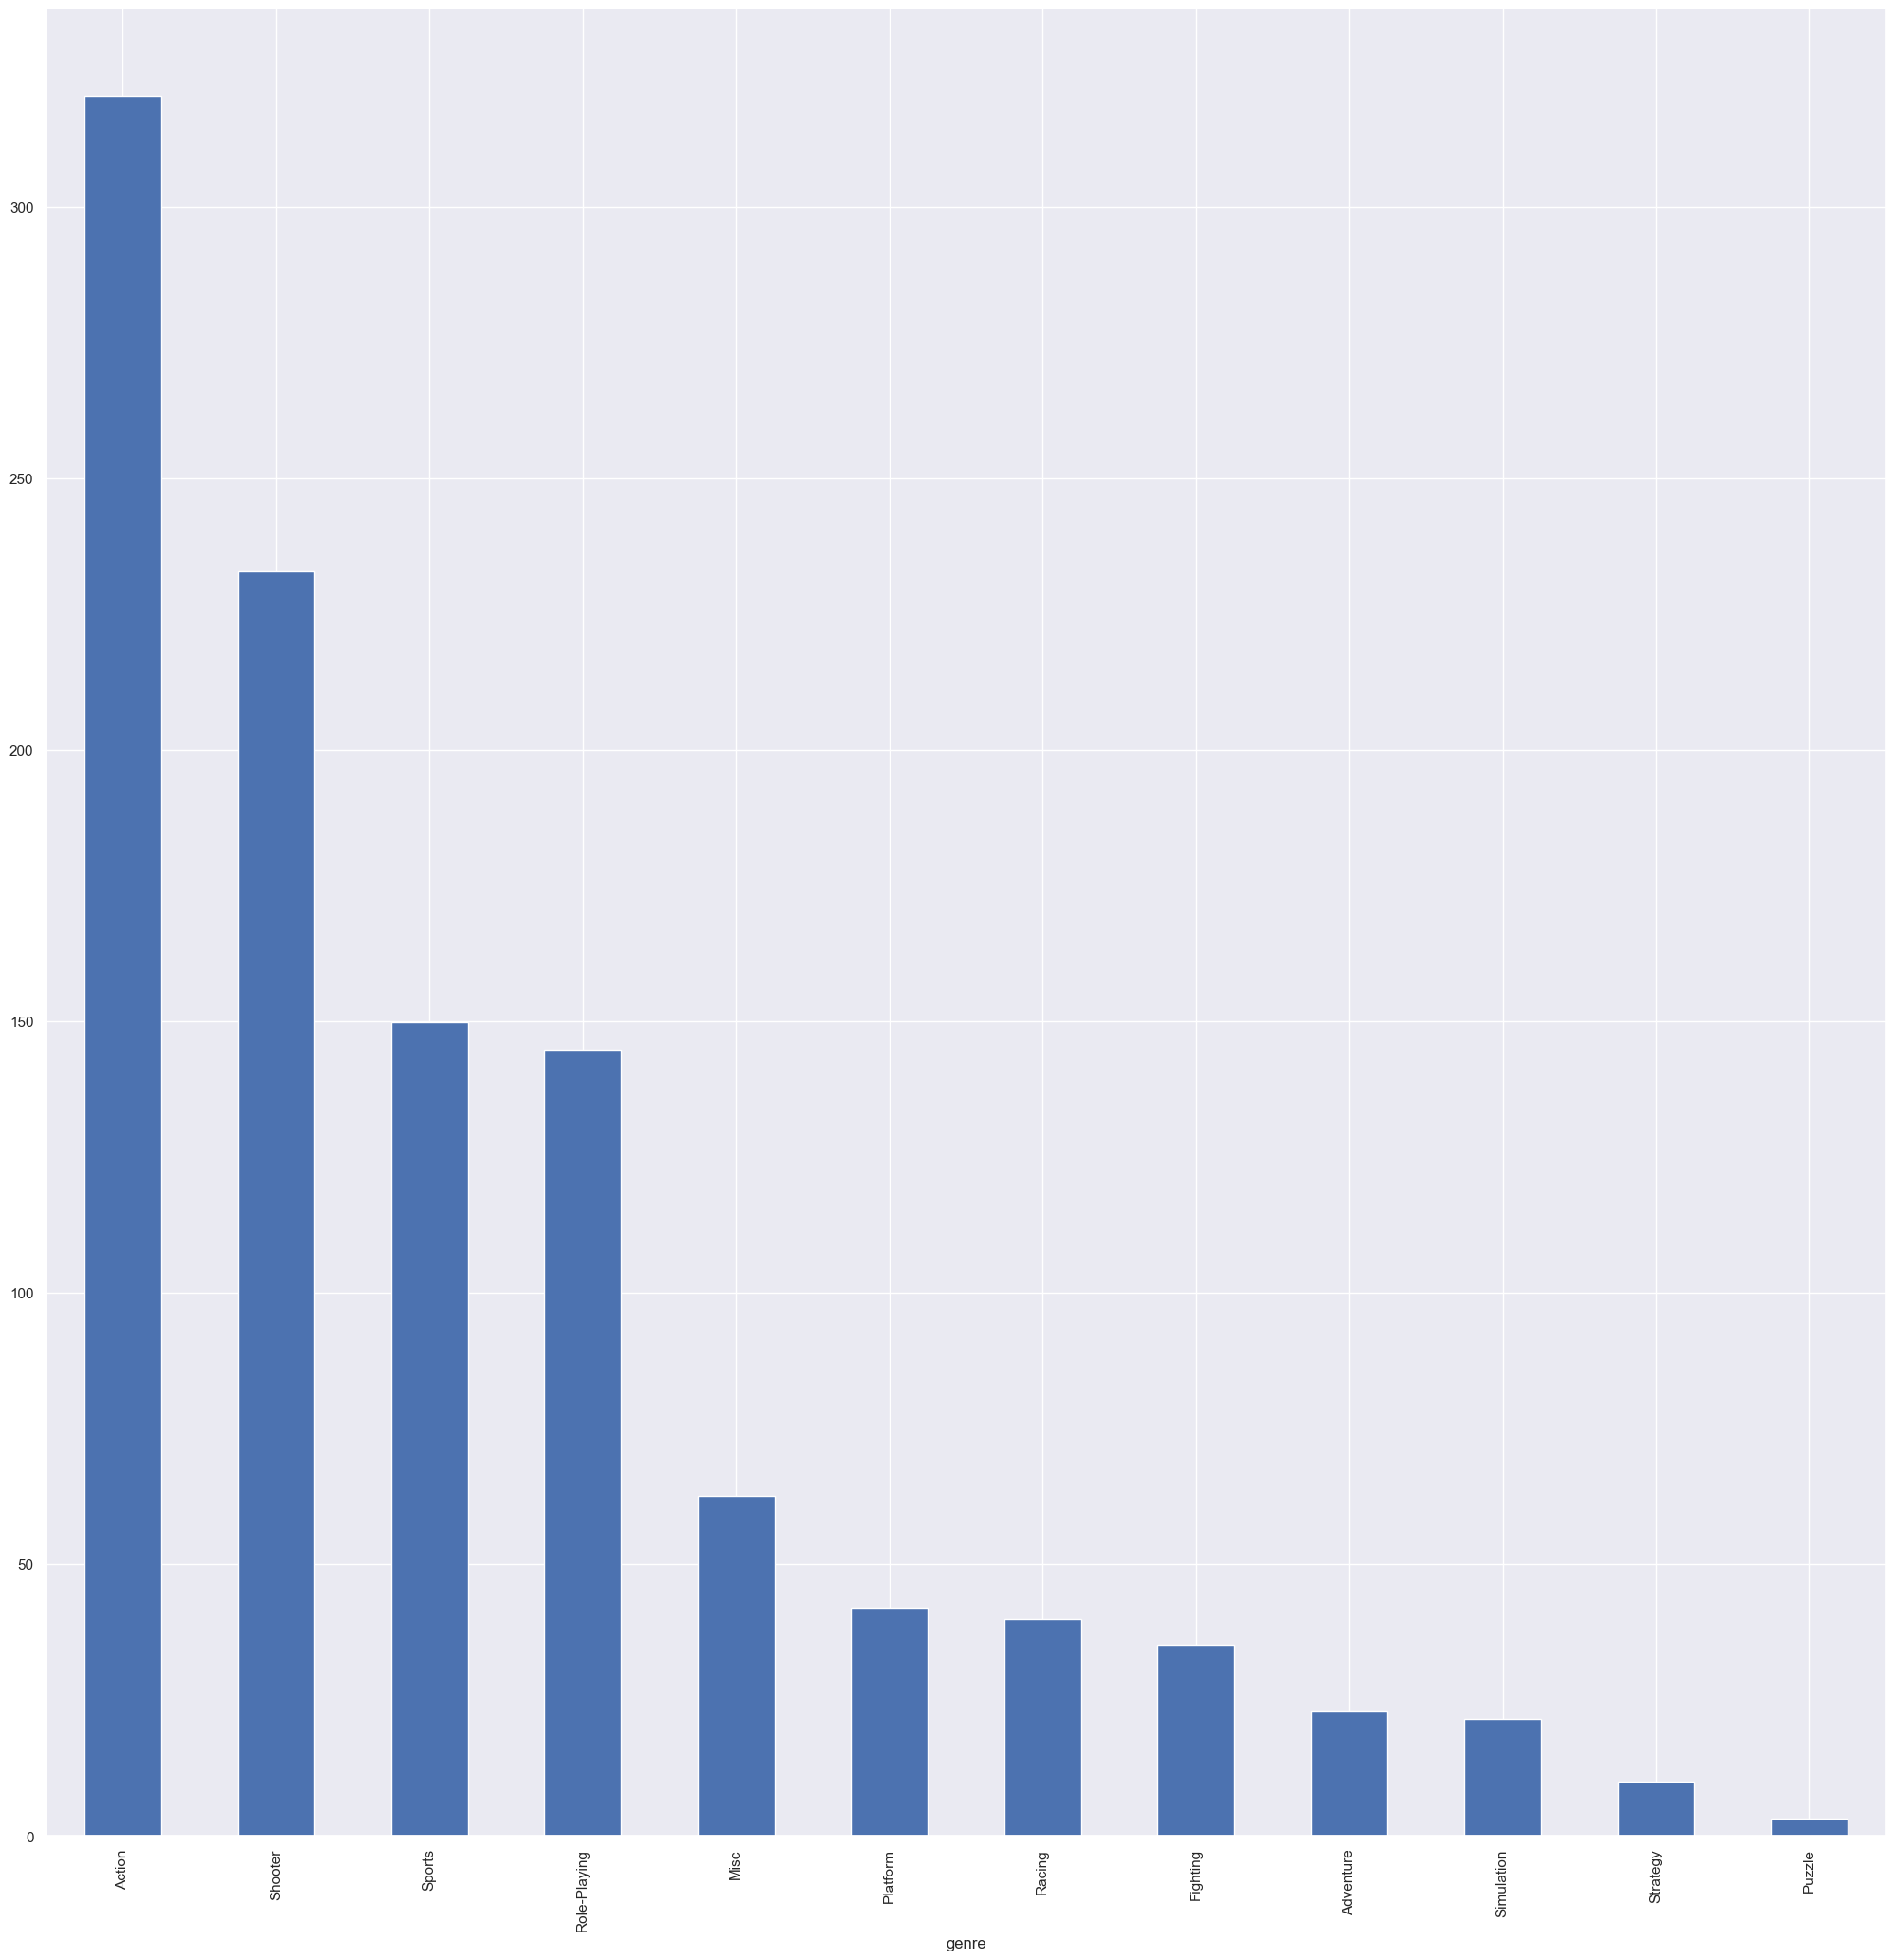

In [175]:
data.groupby('genre')['sales_sum'].sum().sort_values(ascending=False).plot.bar();

Отсюда видно, что лидер по продажам - жанр Action, на втором месте - жанр Shooter, далее идут жанры Role-Playing и Sports. Эти 4 жанра можно объединить в группу "популярные жанры".

Далее идут жанры Misc, Platform, Racing, Fighting, Adventure, Simulation - не такие популярные, как жанры из предыдущей группы, при этом особой разницы в продажах между ними. Можно бы объединить эти жанры в группу "средние по популярности".

И есть 2 жанра имеющие наименьшее число продаж: Strategy, Puzzle.

In [176]:
#группировка суммы столбца с продажами по жанрам с использованием медианного значения продаж
data.groupby('genre')['sales_sum'].median()

genre
Action          0.110
Adventure       0.030
Fighting        0.130
Misc            0.115
Platform        0.225
Puzzle          0.060
Racing          0.120
Role-Playing    0.120
Shooter         0.450
Simulation      0.100
Sports          0.250
Strategy        0.080
Name: sales_sum, dtype: float64

По данным видно, что есть выделяющиеся жанры, а есть группа жанров, не сильно продающихся. Построим диаграмму для наглядности:

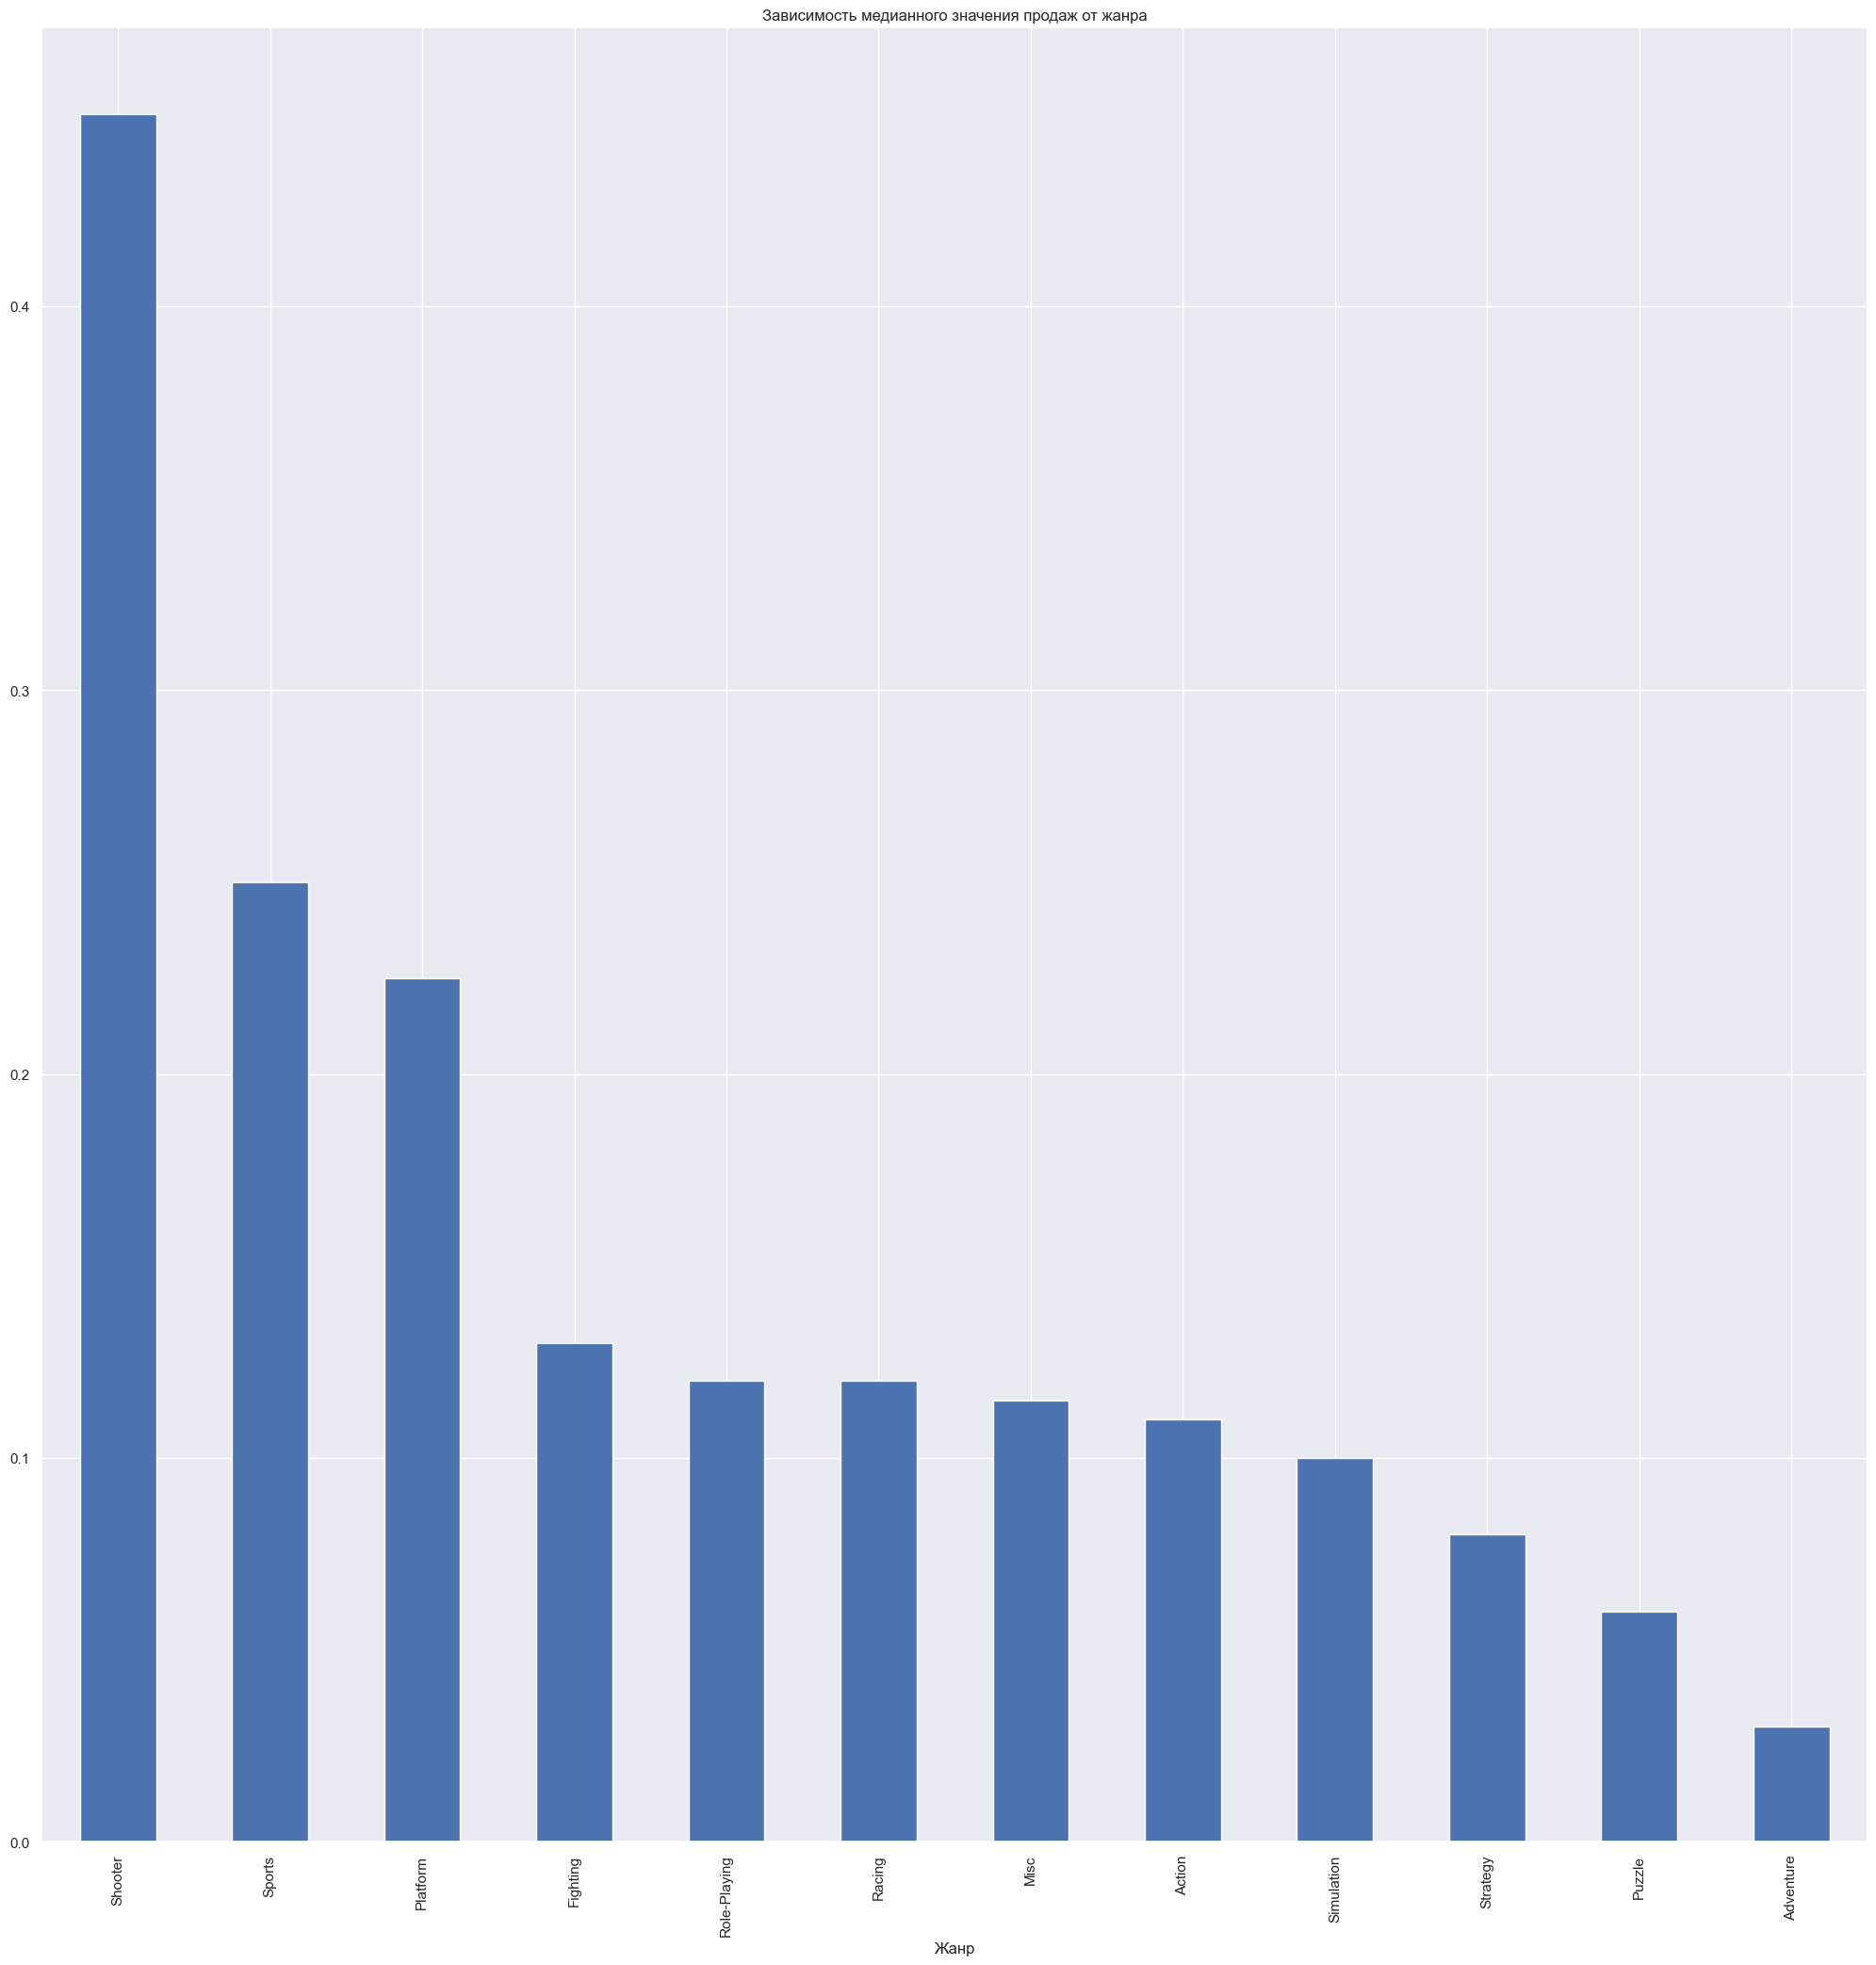

In [177]:
data.groupby('genre')['sales_sum'].median().sort_values(ascending=False).\
plot.bar(title='Зависимость медианного значения продаж от жанра', xlabel='Жанр',y='Кол-во проданных копий, шт');

Всё поменялось! Судя по медианным продажам, самым продаваемым является жанр Shooter, на условном втором месте можно видеть Sports, Platform, а дальше без серьёзной разницы между жанрами располагаются Fighting, Role-Playing, Racing, Misc, Action, Simulation, и замыкают равно убывая жанры Strategy, Puzzle, Adventure.

Зная суммарные продажи (там в топе был жанр Action) можно сказать, что для данного жанра свойстенны выбросы некоторых сверхуспешных игр, тогда как в принципе наиболее продаваемый жанр - Shooter!

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 

    "окончание новой части исследования"
</div>

## Шаг 4. Составление портрета пользователя для каждого региона.


На данном шаге будет проводиться исследование продаж по различным регионам (NA - Северная Америка, EU - Европа, JP - Япония)

### 4.1 Определение топ-5 популярных платформ. 

Посмотрим на 5 самых популярных платформ и изучим различия в долях продаж.

**Продажи по Северной Америке по топ-5 платформ**

In [178]:
#Расчет продаж для платформ по Северной Америке и отбор 5 самых больших по продажам
na_platf_top5=data.pivot_table(index='platform',values='na_sales',aggfunc=sum).sort_values(by='na_sales',ascending=False)[:5]
#Вывод таблицы
na_platf_top5

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


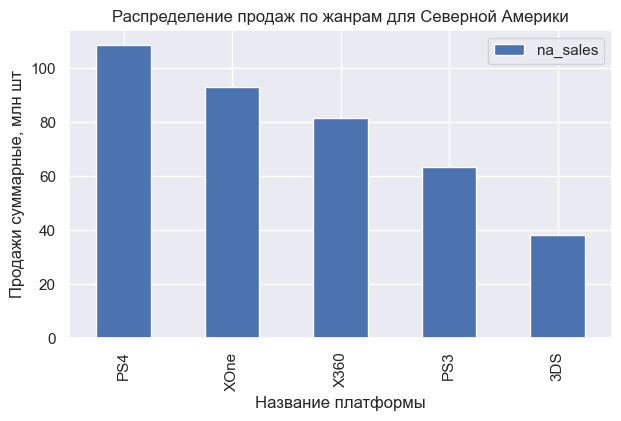

In [179]:
#построение столбчатой диаграммы
na_platf_top5.plot.bar(figsize=(7,4),\
title='Распределение продаж по жанрам для Северной Америки',xlabel='Название платформы',ylabel='Продажи суммарные, млн шт');

Для Северной Америки получаем, что лидером является платформа PS4, при этом на втором месте XOne. Также в рейтинге присутствуют предыдущие платформы от тех же разработчиков: PS3 и X360. 

Интересно заметить: Разница между PS4 и PS3 (Компания PlayStation) почти в 2 раза по продажам игр (PS4 преемница PS3), а для основного конкурента (Компания XBOX) разница между XOne (преемница X360) не такая большая: где-то в 1.2 раза. Что может говорить о том, что либо пользователи XBOX медленнее переходят на обновленную платформу, либо что XOne была выпущена позже, чем PS4.

**Продажи по Европе по топ-5 платформ**

In [180]:
#Расчет продаж для платформ по Европе и отбор 5 самых больших по продажам
eu_platf_top5=data.pivot_table(index='platform',values='eu_sales',aggfunc=sum).sort_values(by='eu_sales',ascending=False)[:5]
#Вывод таблицы
eu_platf_top5

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


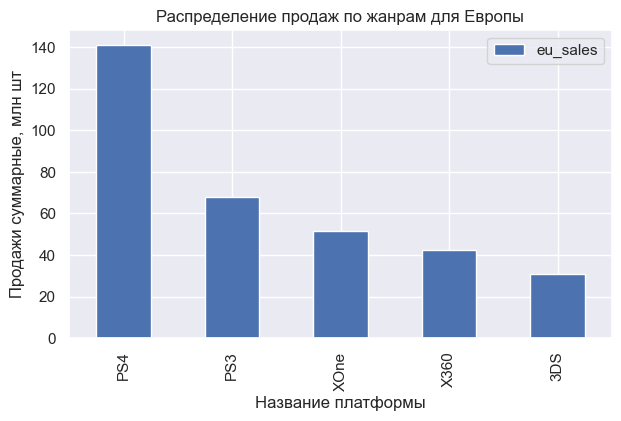

In [181]:
#построение столбчатой диаграммы
eu_platf_top5.plot.bar(figsize=(7,4),\
title='Распределение продаж по жанрам для Европы',xlabel='Название платформы',ylabel='Продажи суммарные, млн шт');

Для Европы получается следующее отличие от рынка Северной Америки: на втором месте по популярности после PS4 идет предшественница PS3, а также можно сказать, что доля рынка, занятая компанией PlayStation больше, чем у Xbox (суммарно 208 млн копий PS в Европе против 163 млн копий PS в Северной Америке), а в Северной Америке разницы между этими компаниями сильной нет.

Платформа 3DS показывает себя аналогичным образом: замыкает 5 лидеров с небольшим отличием по количеству копий.

**Продажи по Японии по топ-5 платформ**

In [182]:
#Расчет продаж для платформ по Японии и отбор 5 самых больших по продажам
jp_platf_top5=data.pivot_table(index='platform',values='jp_sales',aggfunc=sum).sort_values(by='jp_sales',ascending=False)[:5]
#Вывод таблицы
jp_platf_top5

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


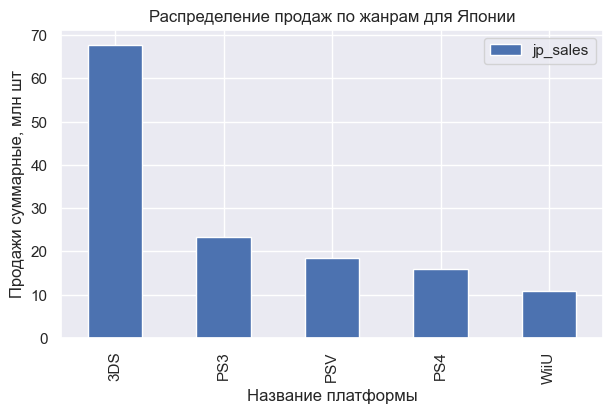

In [183]:
#построение столбчатой диаграммы
jp_platf_top5.plot.bar(figsize=(7,4),\
title='Распределение продаж по жанрам для Японии',xlabel='Название платформы',ylabel='Продажи суммарные, млн шт');

Судя по данным, для Японии свойственно иное распределение рынка игровой индустрии: лидером является платформа 3DS (которая в Северной Америке и Европе занимала только 5-ое место по продажам), не представлены в топ-5 платформы фирмы Xbox совсем, на 3 месте по популярности оказывается портативная консоль от фирмы PlayStation PSV, а замыкает пятёрку лидеров платформа WiiU, которая не достигала этого рейтинга для других регионов.

## 4.2 Определение топ-5 популярных жанров.

Посмотрим на 5 самых популярных игровых жанров и изучим различия в долях продаж по регионам.

**Продажи по Северной Америке по топ-5 жанров**

In [184]:
#Расчет продаж для жанров по Северной Америке и отбор 5 самых больших по продажам
na_genre_top5=data.pivot_table(index='genre',values='na_sales',aggfunc=sum).sort_values(by='na_sales',ascending=False)[:5]
#Вывод таблицы
na_genre_top5

,na_sales
genre,
Action,125.83
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.46


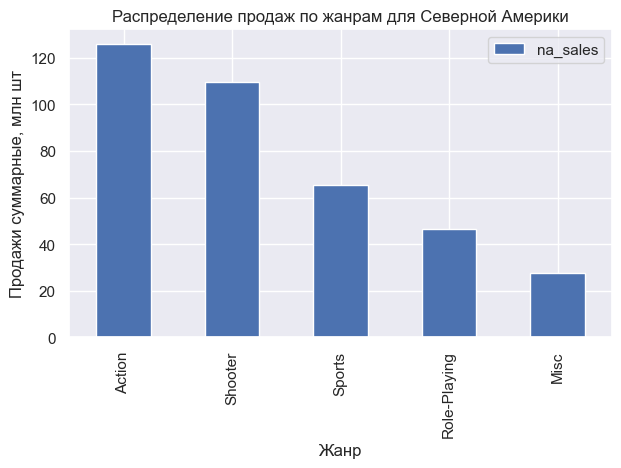

In [185]:
#построение столбчатой диаграммы
na_genre_top5.plot.bar(figsize=(7,4),\
title='Распределение продаж по жанрам для Северной Америки',xlabel='Жанр',ylabel='Продажи суммарные, млн шт');

Для Северной Америки получаем, что лидером является жанр Action, далее с небольшим отрывом Shooter. Далее идут равномерно удаленные жанры Sports, Role-Playing и Misc

**Продажи по Европе по топ-5 жанров**

In [186]:
#Расчет продаж для жанров по Европе и отбор 5 самых больших по продажам
eu_genre_top5=data.pivot_table(index='genre',values='eu_sales',aggfunc=sum).sort_values(by='eu_sales',ascending=False)[:5]
#Вывод таблицы
eu_genre_top5

,eu_sales
genre,
Action,117.87
Shooter,87.86
Sports,60.34
Role-Playing,36.97
Racing,20.19


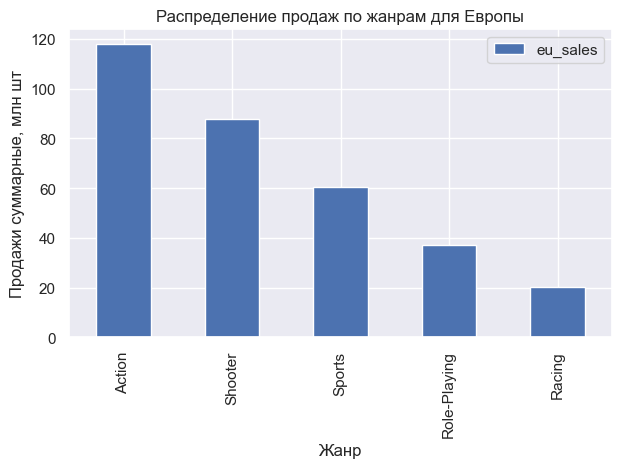

In [187]:
#построение столбчатой диаграммы
eu_genre_top5.plot.bar(figsize=(7,4),\
title='Распределение продаж по жанрам для Европы',xlabel='Жанр',ylabel='Продажи суммарные, млн шт');

Для Европы получается следующее отличие от рынка Северной Америки: на 5 месте вместо категории Misc оказалась категория Racing. Теоретически можно объяснить это культурными особенностями: в Европе существует давняя и серьезно укоренившаяся традиция автомобильного спорта: Формулы, многочисленные Ралли, автопробеги и так далее, что как началось с момента изобретения автомобиля, так и остается популярным до сих пор, в то время как в Северной Америке (хоть и очень автомобилизированной) традиции именно автомобильного спорта не так заметны (из мировой известности на слуху пожалуй только NASCAR).

В остальном распределение по жанрам аналогично рынку Северной Америки.

**Продажи по Японии по топ-5 жанров**

In [188]:
#Расчет продаж для жанров по Японии и отбор 5 самых больших по продажам
jp_genre_top5=data.pivot_table(index='genre',values='jp_sales',aggfunc=sum).sort_values(by='jp_sales',ascending=False)[:5]
#Вывод таблицы
jp_genre_top5

,jp_sales
genre,
Role-Playing,50.01
Action,39.65
Misc,9.03
Fighting,7.63
Shooter,6.61


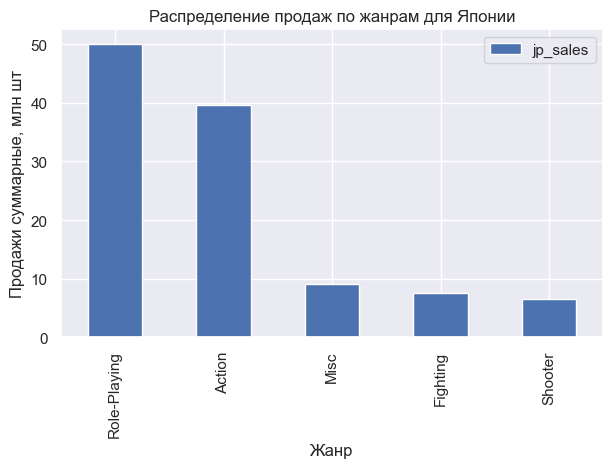

In [189]:
#построение столбчатой диаграммы
jp_genre_top5.plot.bar(figsize=(7,4),\
title='Распределение продаж по жанрам для Японии',xlabel='Жанр',ylabel='Продажи суммарные, млн шт');

Так же как и для платформ, рынок Японии в разрезе жанров тоже сильно отличается от рынка Северной Америки и Европы: первое место занимает Role-Playing, а Action смещен на 2ое. Misc занял 3е место, Fighting (который не попал в топ-5 Северной Америки и Европы) занял 4 место, а замыкает топ-5 категория Shooter. 

Данные отличия можно легко объяснить отличием типично-западной и японской культур.

### 4.3 Исследование влияние рейтинга ESRB на продажи.

**Продажи по Северной Америке в зависимости от рейтинга ESRB**

In [190]:
#Расчет продаж для рейтинга ESRB по Северной Америке
na_esrb=data.pivot_table(index='rating',values='na_sales',aggfunc=sum).sort_values(by='na_sales',ascending=False)
#Вывод таблицы
na_esrb

,na_sales
rating,
M,165.21
no_rate,89.18
E,78.94
E10+,54.02
T,49.79


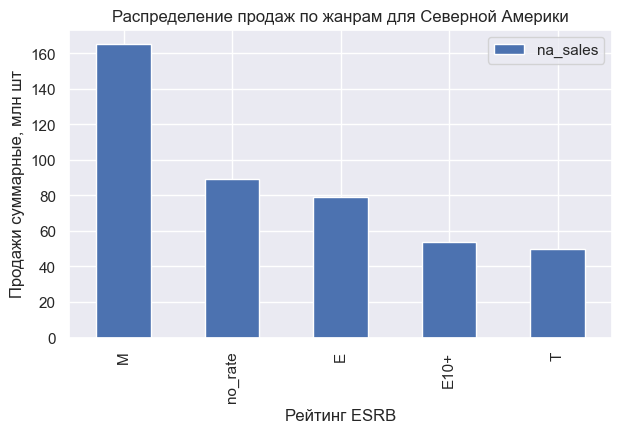

In [191]:
#построение столбчатой диаграммы
na_esrb.plot.bar(figsize=(7,4),\
title='Распределение продаж по жанрам для Северной Америки',xlabel='Рейтинг ESRB',ylabel='Продажи суммарные, млн шт');

Для Северной Америки получаем, что лидером является игры с рейтингом M, на втором месте игры рейтинга E, тогда как между E10+, T разница не так значительна.

Вывод после заполнения пропусков no rate:

    После уточнения можно сказать, что на втором месте находится масса игр без рейтинга, тогда как остальные данные остаются аналогично как и до заполнения пропусков.


**Продажи по Европе в зависимости от рейтинга ESRB**

In [192]:
#Расчет продаж для рейтинга ESRB по Европе
eu_esrb=data.pivot_table(index='rating',values='eu_sales',aggfunc=sum).sort_values(by='eu_sales',ascending=False)
#Вывод таблицы
eu_esrb

,eu_sales
rating,
M,145.32
E,82.80
no_rate,78.61
E10+,42.53
T,41.95


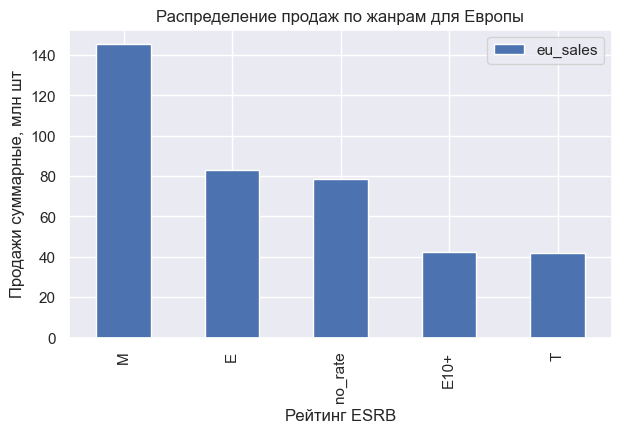

In [193]:
#построение столбчатой диаграммы
eu_esrb.plot.bar(figsize=(7,4),\
title='Распределение продаж по жанрам для Европы',xlabel='Рейтинг ESRB',ylabel='Продажи суммарные, млн шт');

Для Европы основное отличие от Северной Америки заключается в том, что второе место (с рейтингом E) немного поближе к 1ому (М), тогда как между E10+ и T разнциа ещё менее значительная.

**Продажи по Японии в зависимости от рейтинга ESRB**

In [194]:
#Расчет продаж для рейтинга ESRB по Японии
jp_esrb=data.pivot_table(index='rating',values='jp_sales',aggfunc=sum).sort_values(by='jp_sales',ascending=False)
#Вывод таблицы
jp_esrb

,jp_sales
rating,
no_rate,82.05
T,20.44
E,15.00
M,14.11
E10+,5.89


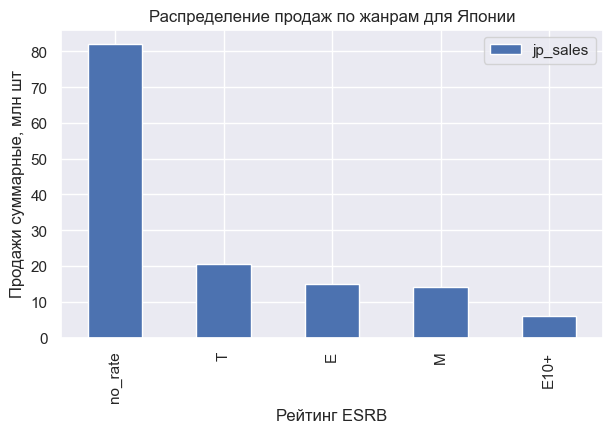

In [195]:
#построение столбчатой диаграммы
jp_esrb.plot.bar(figsize=(7,4),\
title='Распределение продаж по жанрам для Японии',xlabel='Рейтинг ESRB',ylabel='Продажи суммарные, млн шт');

И вновь отличие Японии разительно: первое местое заняли игры с рейтингом T (последнее для Европы и Северной Америки), второе - также E, M занимает третье место, а E10+ смещено на последнее. Также стоит отметить, что между E и M значительной разницы в популярности нет.

 Вывод после заполнения пропусков no rate:
 
    А для Японии и после заполнения пропусков выявилась особенность: игры, которые не категоризируются данным рейтингом, занимают первое место по продажам. Можно предположить, что в Японии  действует отдельная организация по сертификации игр или же ESRB представлена в каком-то ином виде.


## Шаг 5. Проверка гипотез:


### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

Проверку данной гипотезы осуществим с применением t-теста методом для двух генеральных совокупностей. 

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги платформ XBox One и PC различные.

In [197]:
#создаем выборки для пользовательских оценок
xbox_one_user_score=data[data['platform']=='XOne']['user_score'].astype('float64')
pc_user_score=data[data['platform']=='PC']['user_score'].astype('float64')

alpha=0.05

results=st.ttest_ind(xbox_one_user_score,pc_user_score,nan_policy='omit')

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611503
Не получилось отвергнуть нулевую гипотезу



Скорректированный вывод:
    
По результатам проведенного t-теста мы можем утверждать, что не получается отвергнуть нулевую гипотезу (средние пользовательские рейтинги платформ XOne и PC одинаковые) и значит с большой долей вероятности средние пользовательские рейтинги не имеют статистически значимых отличий.


### 5.2 Средние пользовательские рейтинги жанров Action и Sports разные. 

Гипотезы:
    
    
    Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.

    Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.
    
Получается, для утверждения в заголовке (средние пользовательские рейтинги жанров разные) нужно провести t-тест, сравнить p-value с альфа, и если он меньше, то мы отвергаем нулевую гипотезу, и тогда можно говорить, что с большой долей вероятности рейтинги разные.


In [199]:
#СТАЛО
#создаем выборки для пользовательских оценок
action_user_score=data[data['genre']=='Action']['user_score'].astype('float64')
sports_user_score=data[data['genre']=='Sports']['user_score'].astype('float64')

alpha=0.05

results=st.ttest_ind(action_user_score,sports_user_score,nan_policy='omit')

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.8791962987532298e-27
Отвергаем нулевую гипотезу


Таким образом, можно с определенной уверенностью говорить о том, что средние пользовательские рейтинги для жанров Action и Sports разные.

## Шаг 6. Общий вывод


**Основная тема исследования:** Изучение данных о продажах компьютерных игр и нахождение особенностей и зависимостей для осуществления прогнозов на 2017 год.

**Краткое описание проведённых действий:** 

Выполнена предобработка данных (заполнены по возможности пропуски, исключены дубликаты и аномальные значения);

Произведены дополнительные вычисления (суммарные продажи в мире по каждой игре);

Проведён исследовательский анализ данных: изучение зависимостей продаж от года продаж, игровой платформы, отзывов критиков и пользователей, регионов распространения, игровых жанров.

**Основные выводы:**

1.  Игровые платформы имеют свой срок жизни в разрезе пригодности для запуска на них игр, он составляет 10-12 лет для наиболее успешных устройств. Поэтому в смысле учета данных для возможности прогноза продаж будущего года нет смысла использовать всю информацию, начиная с 1990 года: нужно рассматривать информацию актуальную для используемых платформ на сегодняшний день.

2.  Есть платформы, на которых виден резкий спад продаж (эти платформы можно считать точно не прибыльными): 3DS, PS3, Wii, X360
    Есть платформы, на которых прослеживается незначительный рост/стабильный спрос в 2013-2014 годах с последующим снижением в 2015-2016 годах (эти платформы можно считать ещё потенциально "работающими пару лет", но роста продаж на них ждать скорее всего не стоит: PC, PSV, WiiU
    И есть платформы со значительным ростом в 2013-2015 годах (их можно считать потенциально прибыльными): PS4, XOne

3. Необходимо обращать внимание на производителя платформы и на выпуск им платформы-преемника: даже для супер-успешных платформ (таких как PS3 или X360) выпуск преемника начинает резко перетягивать на себя продажи игр.

4. Рейтинги критиков оказывают значительное влияние на продажи, тогда как рейтинги пользователей - нет. 

5. Наиболее популярные жанры в мире - Shooter, Sports и Platform, тогда как жанру Action свойственны появления игр-бестселлеров. Опять же по регионам присутствуют отличия.</b> 


6. Продажи игр в Северной Америке и Европе имеют сходий спрос по платформам, жанрам и рейтингу ESRB, однако для Японии можно говорить о существенных отличиях: другие лидеры по платформам (например, не представлен особо Xbox), по жанрам (лидер - Role-playing против Action в остальных регионах), по рейтингу ESRB (наибоее популярны игры рейтинга T - игры для подростков, тогда как в остальном мире M - для взрослых). 

Более того: для Японии лидируют продажи тех игр (причем с большим отрывом), которые не категоризируются рейтингом ESRB, что может говорить об отличиях работы данной организационной структуры в стране.


**Общие рекомендации:** 

В основном можно утверждать, что при планировании рекламной кампании и стратегий для бизнеса на 2017 год нужно обратить внимание на:

1. Игры для платформ PS4, XOne - в первую очередь; PC, PSV, WiiU - по остаточному принципу; 3DS, PS3, Wii, X360 - без особого интереса.
2. Необходимо быть в курсе новостей по планиующихся выпусков платформ-преемников.
3. Наиболее популярные и продаваемые жанры в среднем по миру - Shooter, Sports и Platform, тогда как жанру Action свойственны появления игр-бестселлеров и необходимо разбираться более глубоко, вкладываясь в данный жанр (но и есть вероятность более высокой доходности)

4. Рейтинг критиков имеет некоторую важность, тогда как рейтинги игроков можно игнорировать
